# 428_ra236.530_dec-46.922_4U1543

In [1]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import matplotlib.pyplot as plt
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = False

Running on PyMC v5.6.1
Running on PyMC v5.6.1


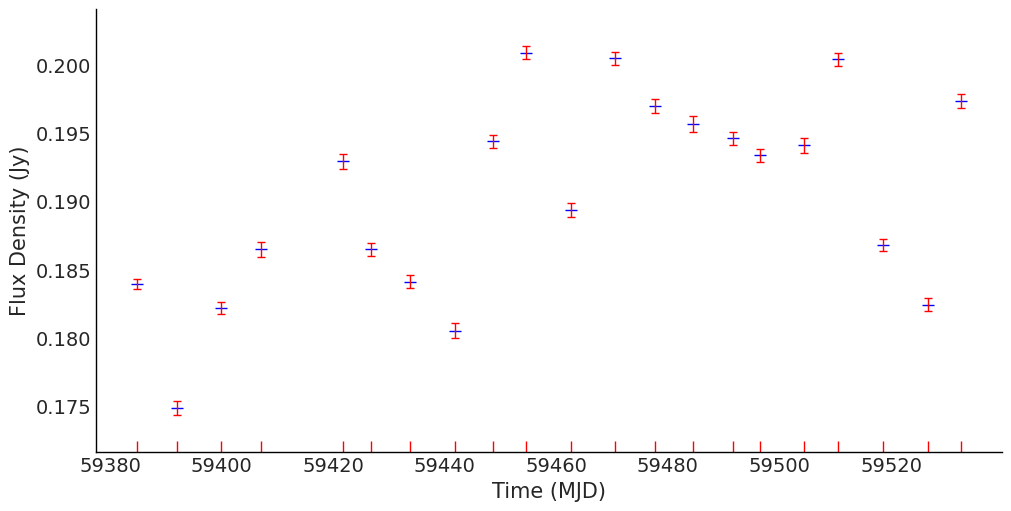

In [2]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[1]
ufn.plot_lc(csv_path, plot_mean=False, show_title=False, show_legend=False, save_plot=True)

## SE Kernel only, Zero Mean Function

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta \exp\left\{ - \frac{1}{2\ell^2}\tau^2\right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN}} \sim \mathcal{N}^+(\;\textrm{mean}[\textrm{stderr}(y)]\;, \;\textrm{SD}[\textrm{stderr}(y)]\;)$$

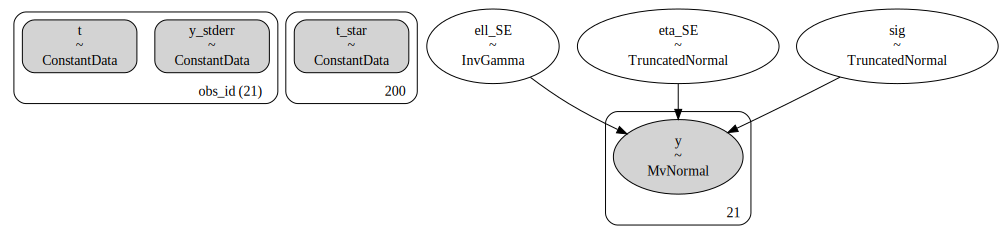

In [3]:
se0_trace_path = Path(f"traces/{csv_path.stem}_se0_idata.nc")
se0_dag_path = Path(f'dags/{csv_path.stem}_se0_dag.dot')

if se0_trace_path.is_file() and not OVERWRITE_TRACES:
    se0_trace = az.from_netcdf(se0_trace_path)
    se0_dag = gv.Source.from_file(se0_dag_path)
else:
    se0_trace, se0_dag = ufn.fit_se_gp(csv_path)
    az.to_netcdf(se0_trace, se0_trace_path)
    with open(se0_dag_path, 'w') as writehandle:
        writehandle.write(se0_dag.source)

gv.Source(se0_dag.source)

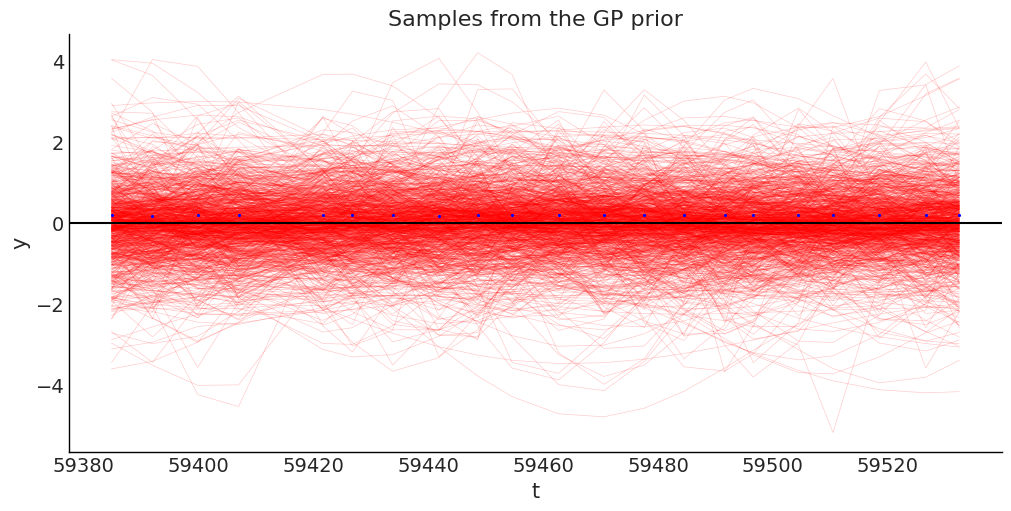

In [4]:
ufn.plot_priorpred_samples(se0_trace, variable_name="y")

In [5]:
variable_names = ["ell_SE", "eta_SE", "sig"]
ufn.print_post_summary(se0_trace, variable_names)

median       mad    eti_16%    eti_84%   mcse_median   ess_median  \
ell_SE  12.376843  0.460028  11.655952  13.042997  1.411674e-02  3532.533646   
eta_SE   0.021854  0.006061   0.014738   0.034788  2.053810e-04  3695.549061   
sig      0.000494  0.000029   0.000453   0.000535  8.305157e-07  3461.516992   

           ess_tail     r_hat       mean        sd  
ell_SE  3064.184405  1.002238  12.353217  0.689672  
eta_SE  2620.044573  1.002224   0.025139  0.012903  
sig     2725.985575  1.002291   0.000494  0.000040

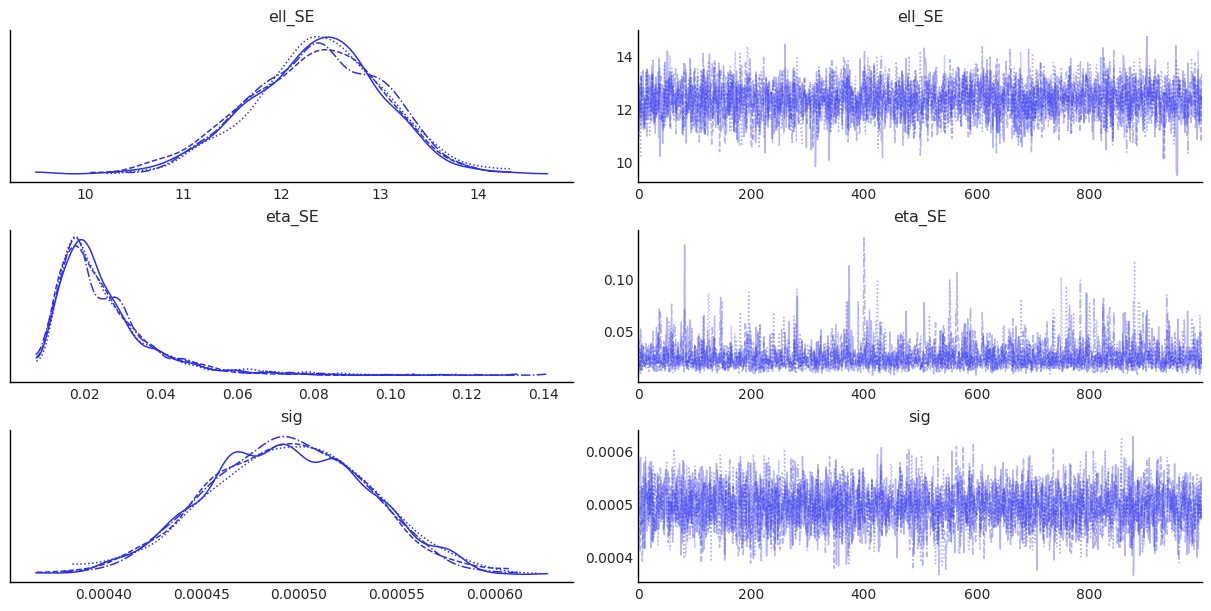

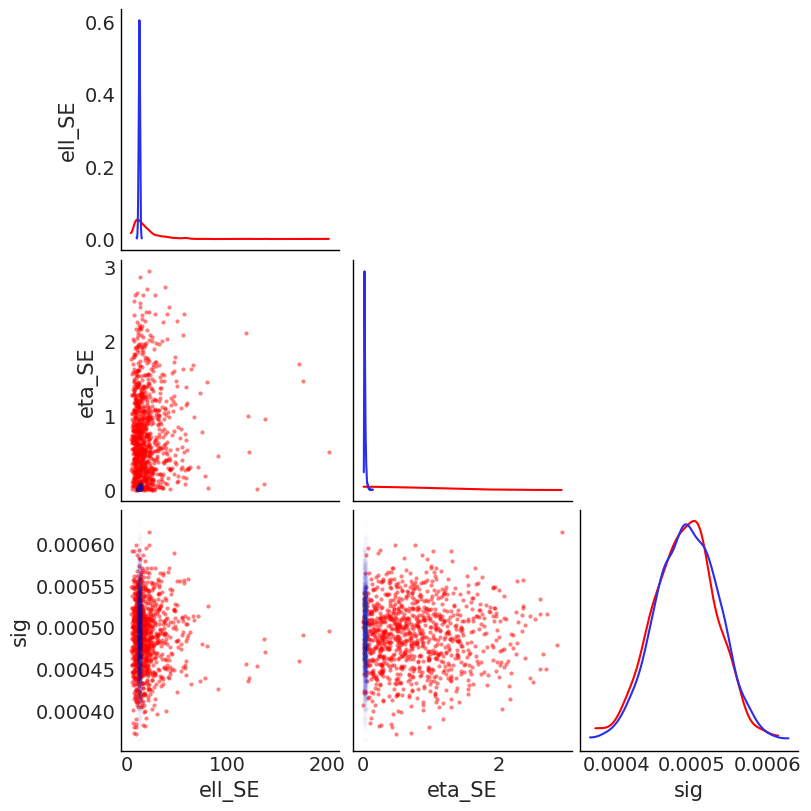

In [6]:
ufn.plot_traces(se0_trace, variable_names)
ufn.plot_priorpost_cnr(se0_trace, variable_names)

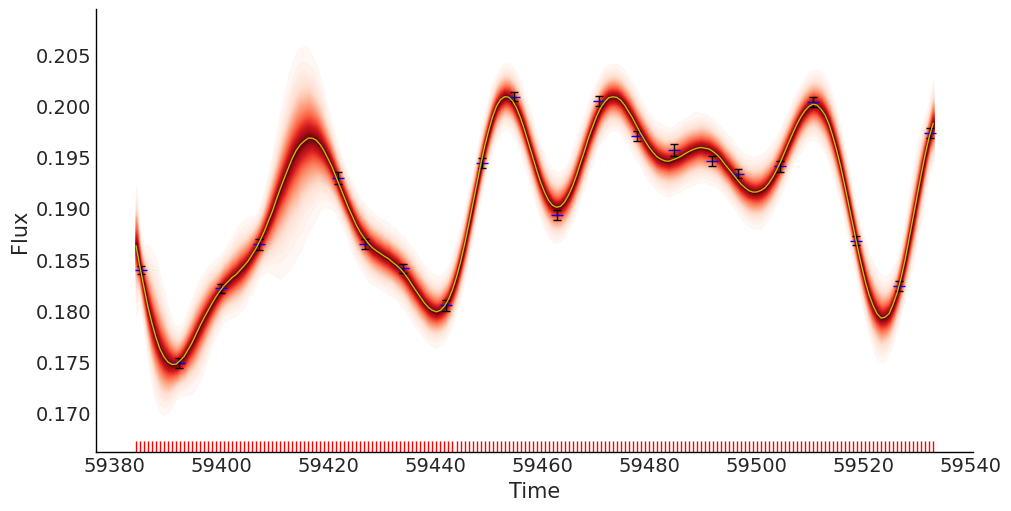

In [7]:
ufn.plot_postpred_samples(se0_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


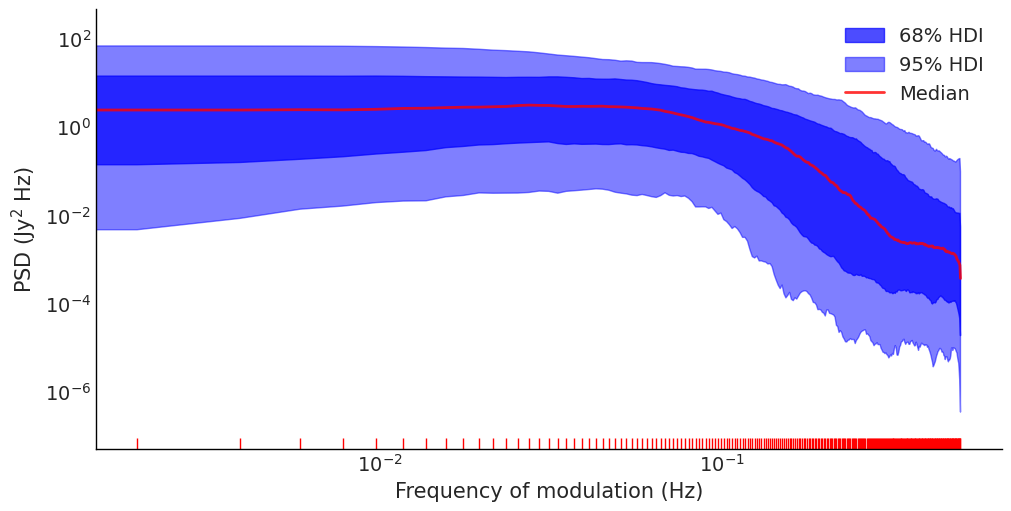

In [8]:
ufn.plot_welch_psd(se0_trace, group="prior_predictive", variable_name="y")
this_xlim = plt.xlim()

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


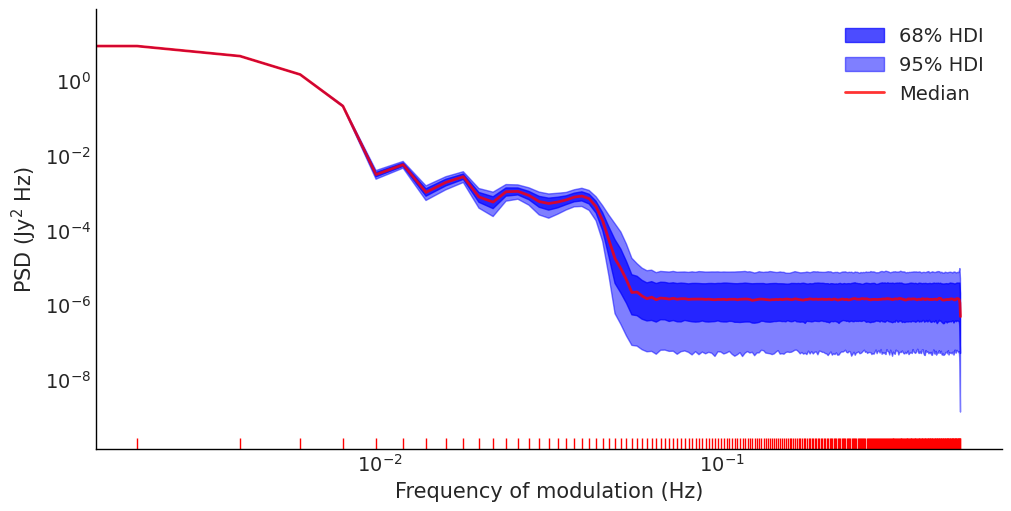

In [9]:
ufn.plot_welch_psd(se0_trace, group="posterior_predictive", variable_name="f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


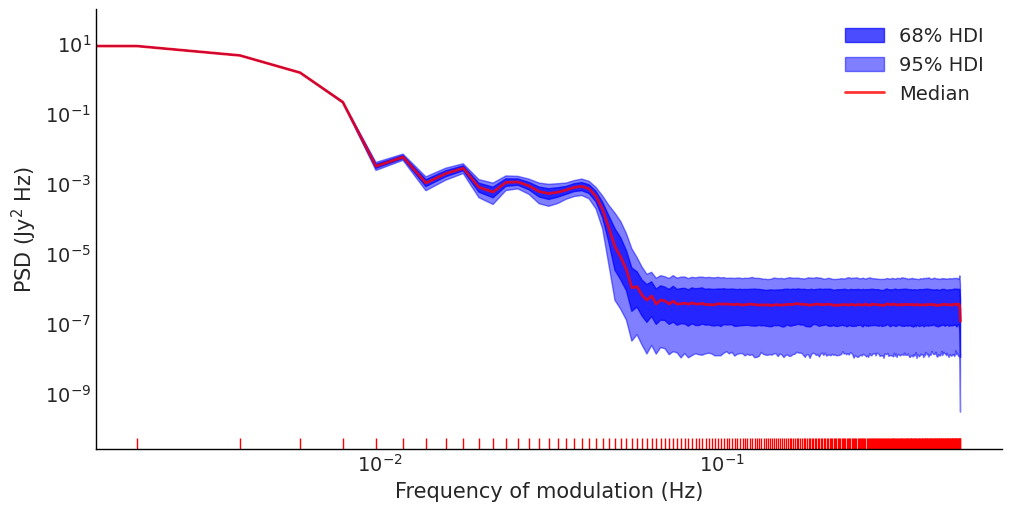

In [10]:
ufn.plot_welch_psd(se0_trace, group="posterior_predictive", variable_name="y_star")

(0.0014801919594828097, 0.6597539553864471)

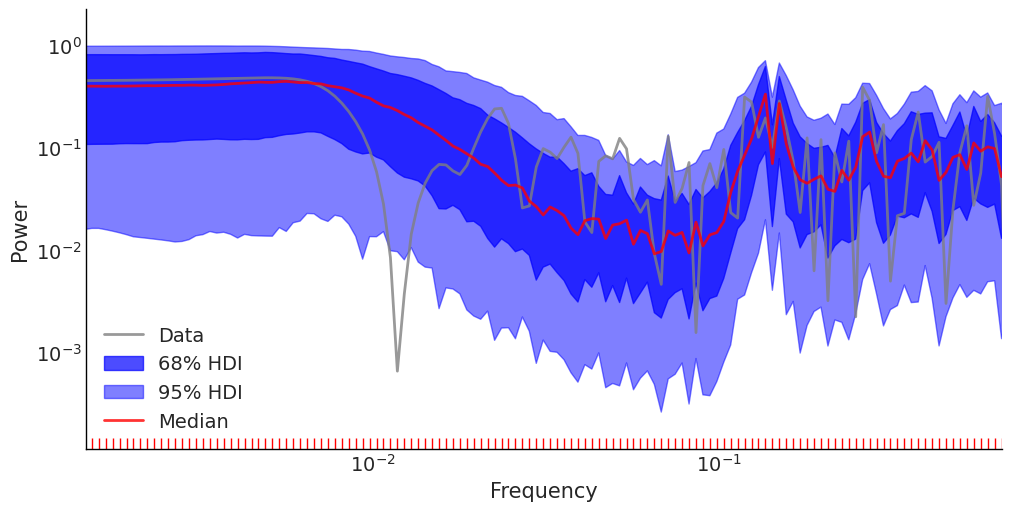

In [11]:
se0_priorpred_xr = ufn.plot_lsp(se0_trace, group="prior_predictive", variable_name="y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

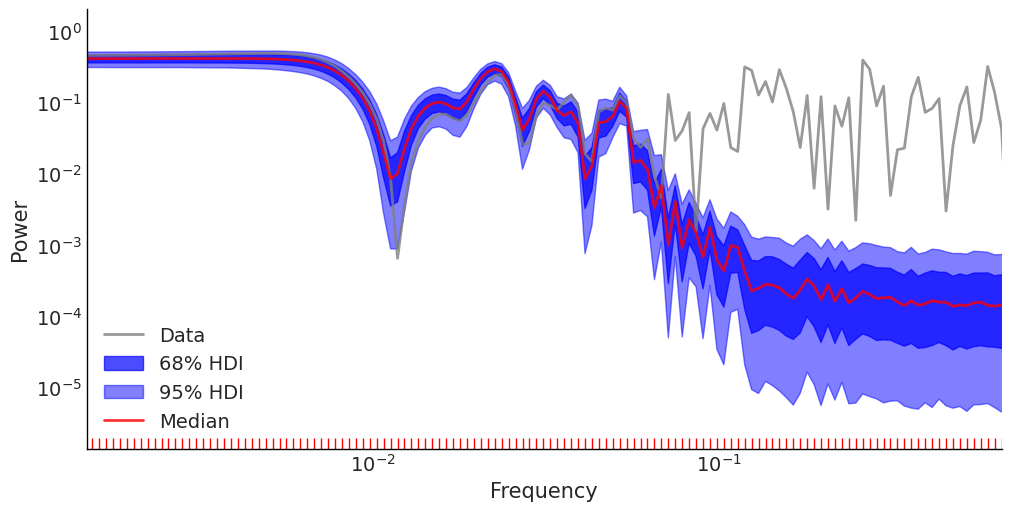

In [12]:
se0_postpred_xr = ufn.plot_lsp(se0_trace, "posterior_predictive", "f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

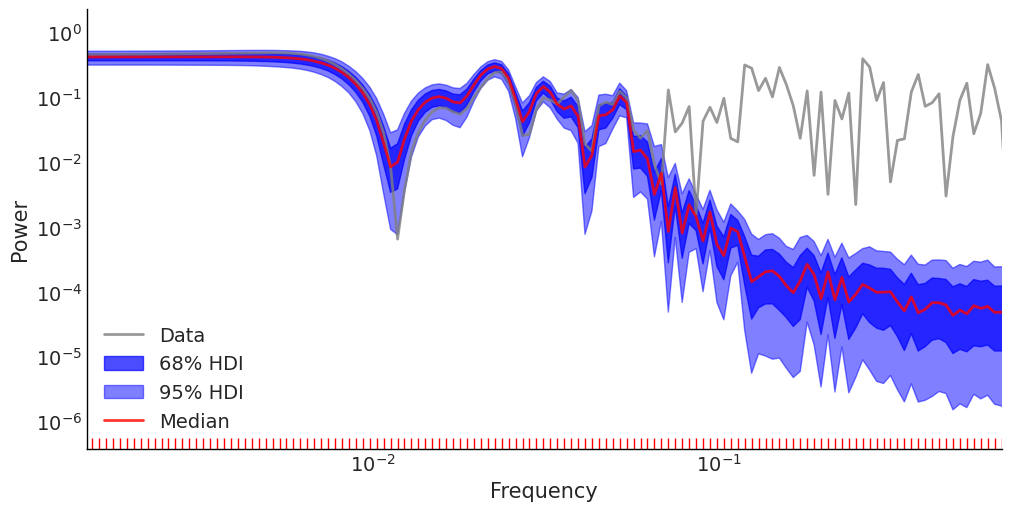

In [13]:
se0_postpred_xr = ufn.plot_lsp(se0_trace, "posterior_predictive", "y_star")
plt.xlim(this_xlim)

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN}} \sim \mathcal{N}^+(\;\textrm{mean}[\textrm{stderr}(y)]\;, \;\textrm{SD}[\textrm{stderr}(y)]\;)$$

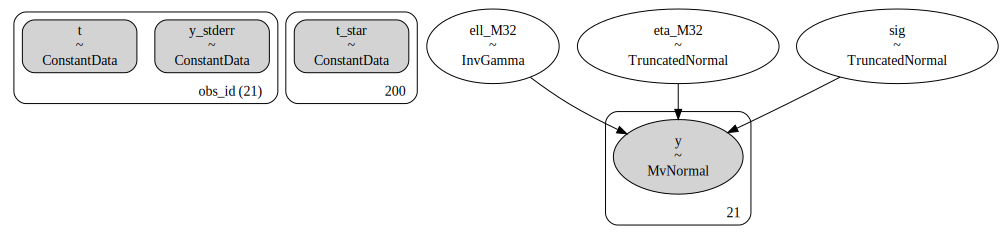

In [14]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [15]:
variable_names = ["ell_M32", "eta_M32", "sig"]
ufn.print_post_summary(m32_trace, variable_names)

median        mad    eti_16%     eti_84%  mcse_median  \
ell_M32  105.681340  26.801949  75.556304  168.553221     1.421638   
eta_M32    0.048026   0.028856   0.019211    0.170735     0.001909   
sig        0.000490   0.000028   0.000450    0.000533     0.000001   

          ess_median     ess_tail     r_hat        mean         sd  
ell_M32  1393.040748  1125.736839  1.002972  121.670515  56.205221  
eta_M32  1391.191980  1134.619001  1.002418    0.116443   0.206769  
sig      2061.795032  1515.918749  1.001895    0.000492   0.000042

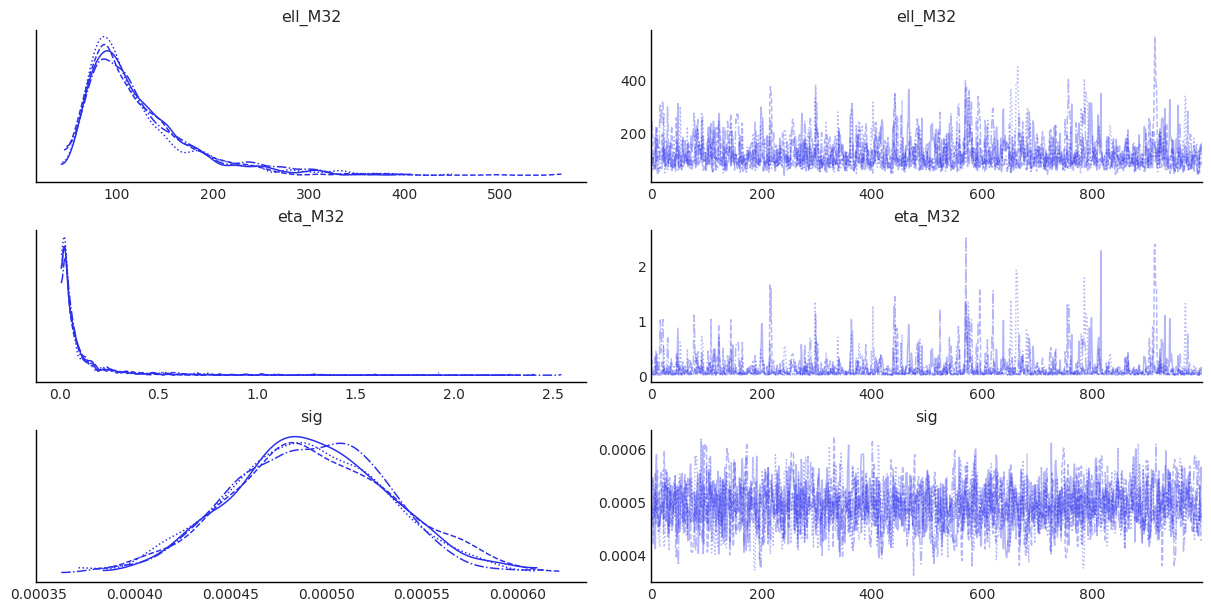

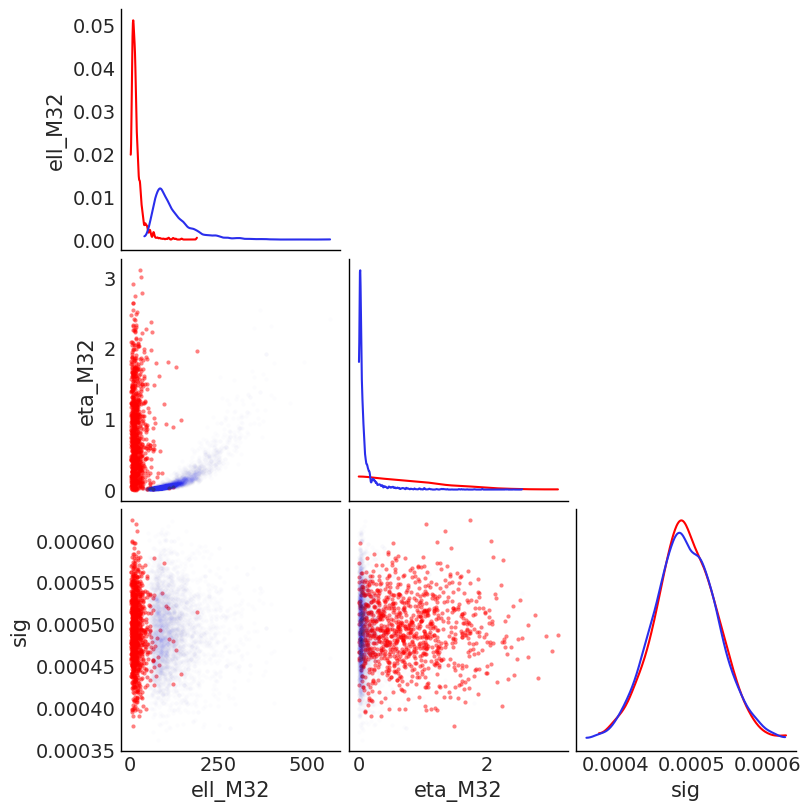

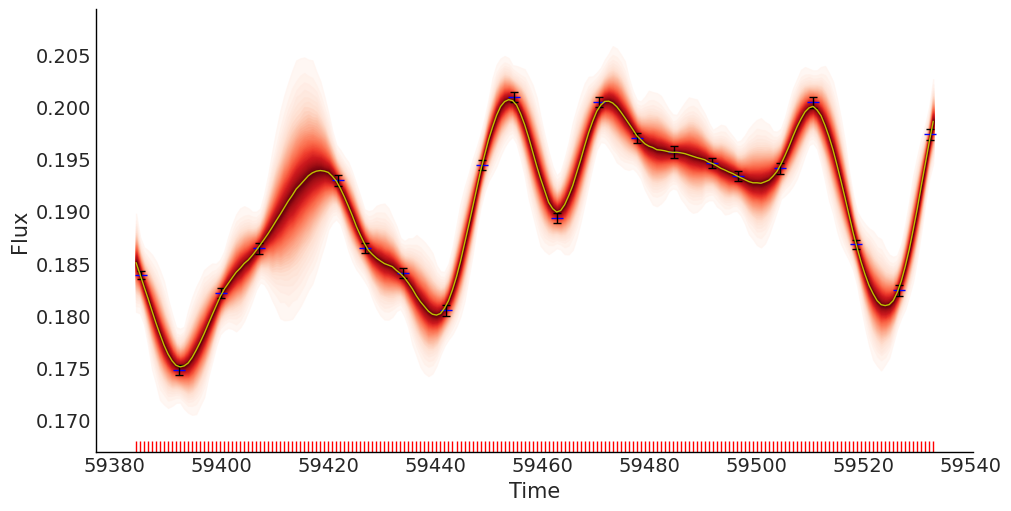

In [16]:
ufn.plot_traces(m32_trace, variable_names)
ufn.plot_priorpost_cnr(m32_trace, variable_names)
ufn.plot_postpred_samples(m32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


(0.0014801919594828097, 0.6597539553864471)

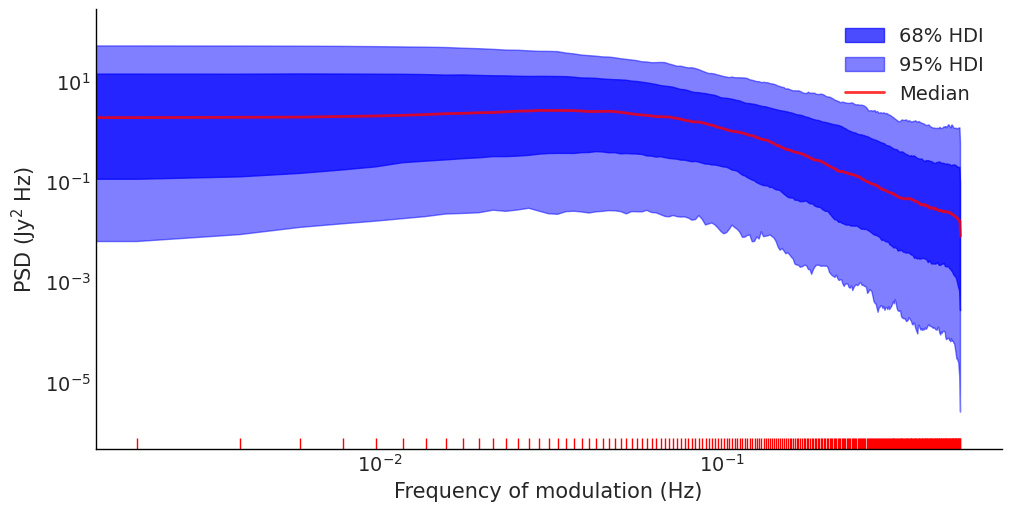

In [17]:
ufn.plot_welch_psd(m32_trace, "prior_predictive", "y")
plt.xlim(this_xlim)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


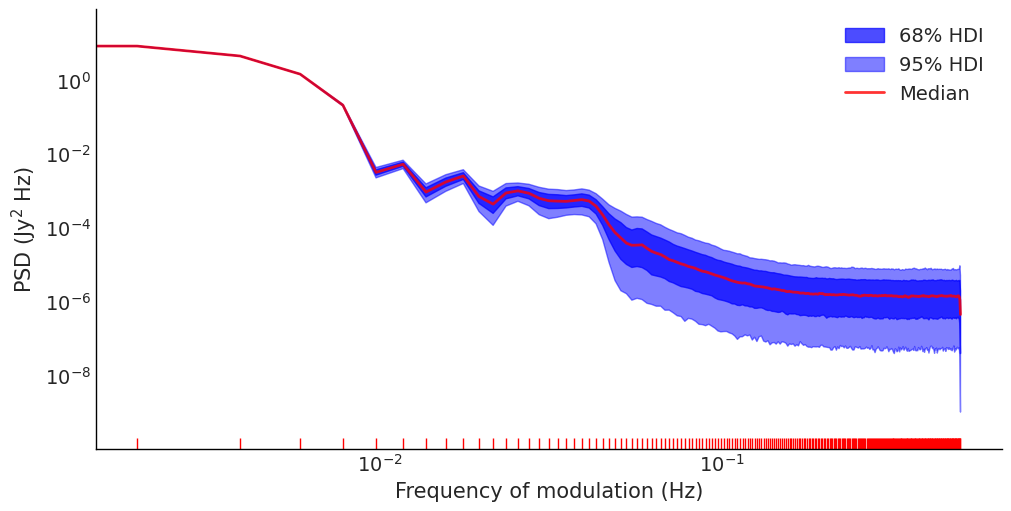

In [18]:
ufn.plot_welch_psd(m32_trace)

(0.0014801919594828097, 0.6597539553864471)

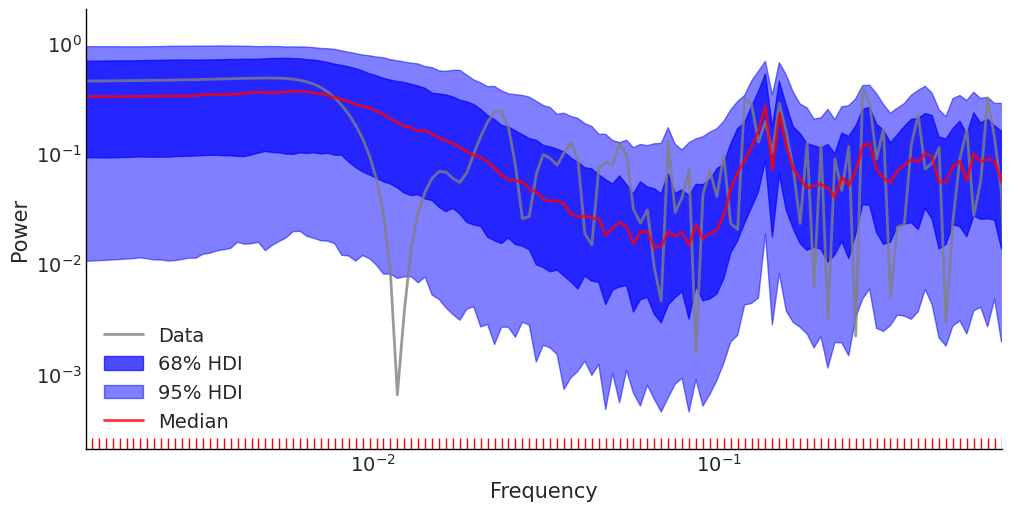

In [19]:
ufn.plot_lsp(m32_trace, "prior_predictive", "y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

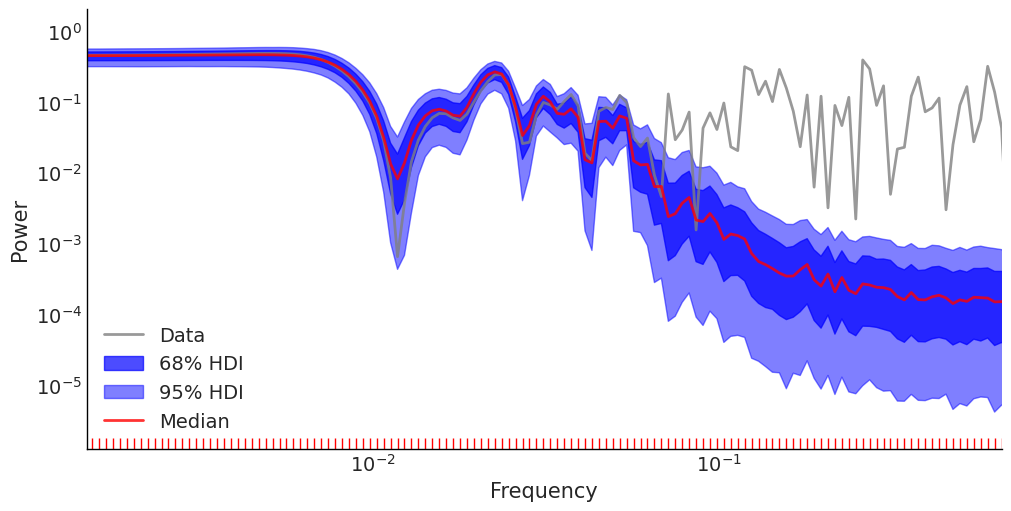

In [20]:
ufn.plot_lsp(m32_trace, "posterior_predictive", "f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

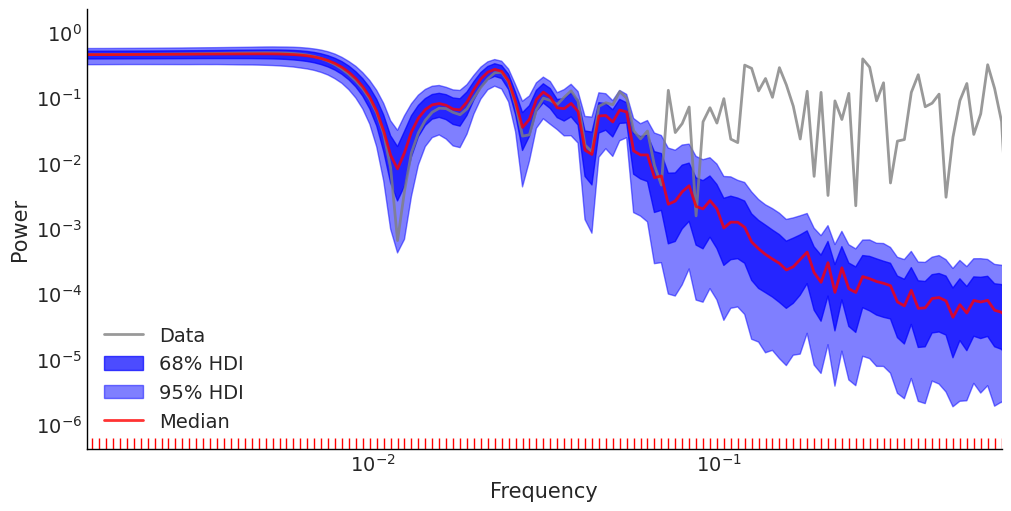

In [21]:
ufn.plot_lsp(m32_trace, "posterior_predictive", "y_star")
plt.xlim(this_xlim)

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \left[ \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\} \right]$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN}} \sim \mathcal{N}^+(\;\textrm{mean}[\textrm{stderr}(y)]\;, \;\textrm{SD}[\textrm{stderr}(y)]\;)$$

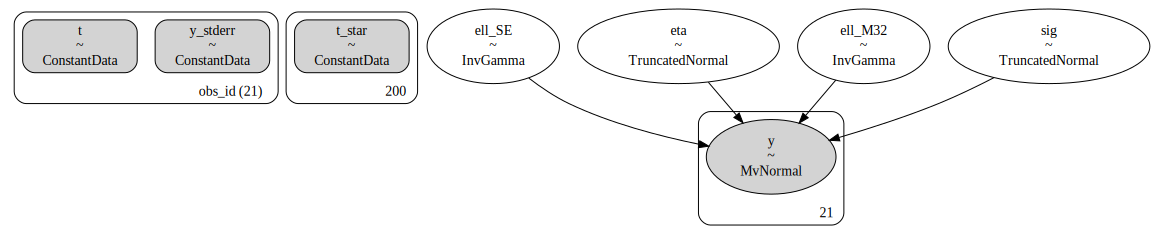

In [22]:
se_m32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
se_m32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if se_m32_trace_path.is_file() and not OVERWRITE_TRACES:
    se_m32_trace = az.from_netcdf(se_m32_trace_path)
    se_m32_dag = gv.Source.from_file(se_m32_dag_path)
else:
    se_m32_trace, se_m32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(se_m32_trace, se_m32_trace_path)
    with open(se_m32_dag_path, 'w') as writehandle:
        writehandle.write(se_m32_dag.source)

gv.Source(se_m32_dag.source)

In [23]:
variable_names = ["ell_SE", "ell_M32", "eta", "sig"]
ufn.print_post_summary(se_m32_trace, variable_names)

median        mad    eti_16%     eti_84%   mcse_median  \
ell_SE   69.646322  23.899624  42.593854  128.133001  8.555893e-01   
ell_M32  69.886251  15.268144  51.638876  100.457519  8.044844e-01   
eta       0.015045   0.007820   0.007083    0.040829  4.324421e-04   
sig       0.000490   0.000028   0.000449    0.000531  8.613795e-07   

          ess_median     ess_tail     r_hat       mean         sd  
ell_SE   2423.772076  1225.319601  1.002657  88.875559  74.602750  
ell_M32  1680.952181  1072.198103  1.003157  76.650812  30.067659  
eta      1640.259580  1104.634633  1.003059   0.029389   0.050253  
sig      3137.032244  1866.522674  0.999869   0.000490   0.000041

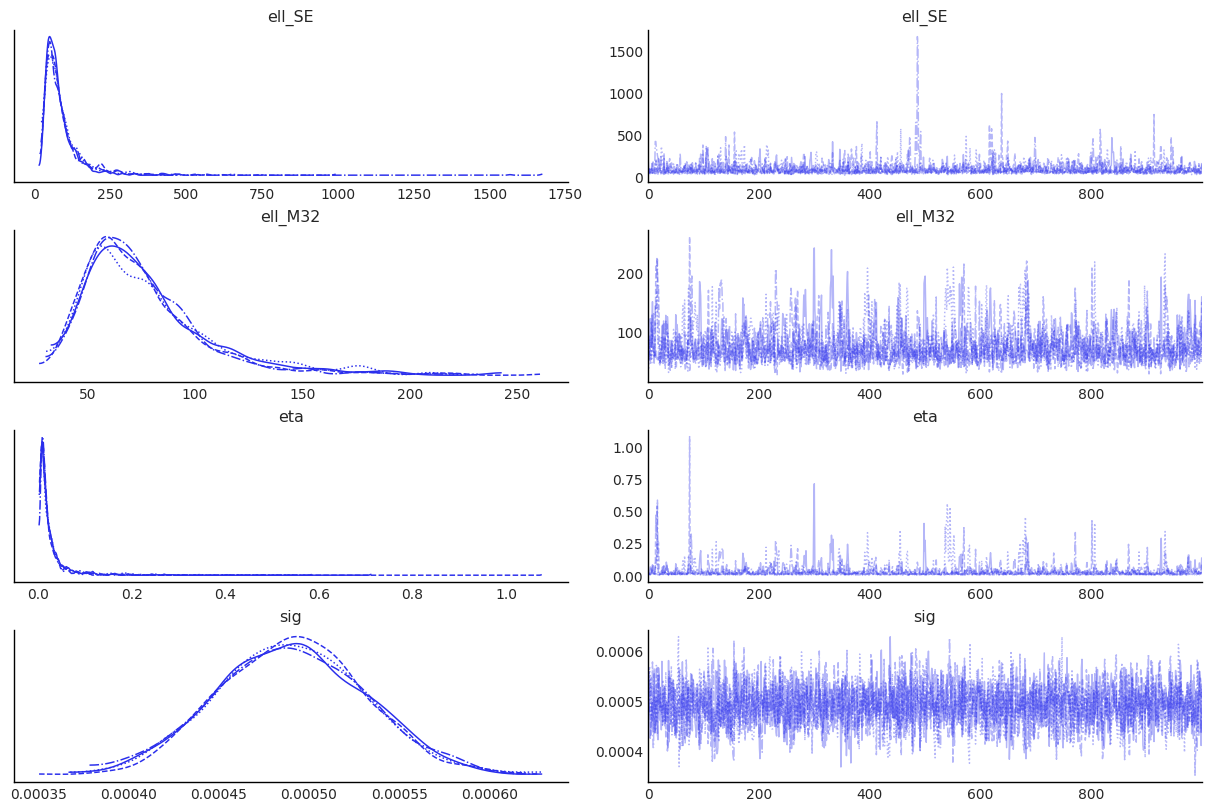

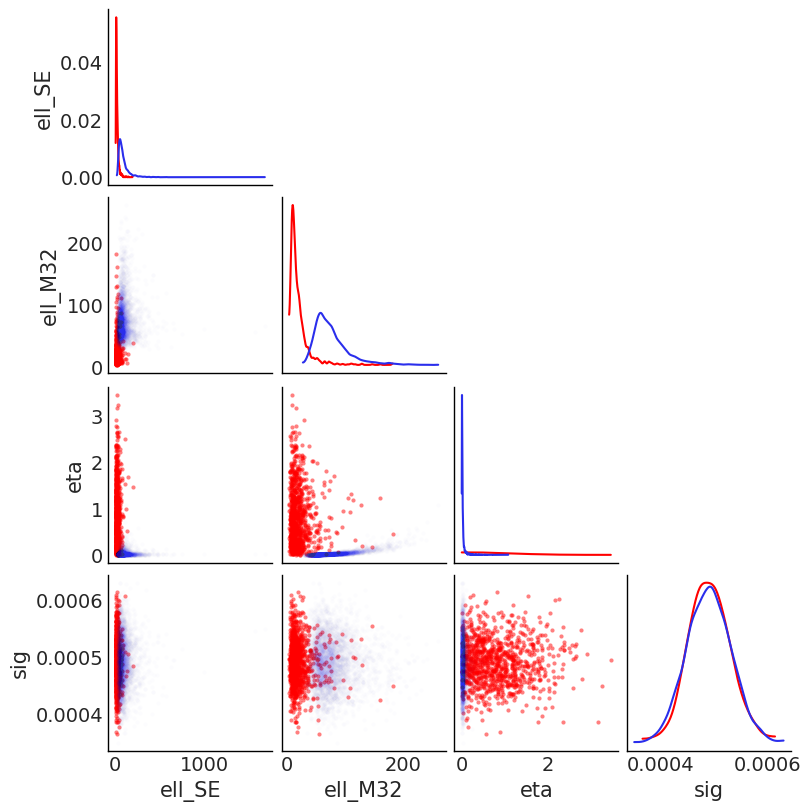

In [24]:
ufn.plot_traces(se_m32_trace, variable_names)
ufn.plot_priorpost_cnr(se_m32_trace, variable_names)

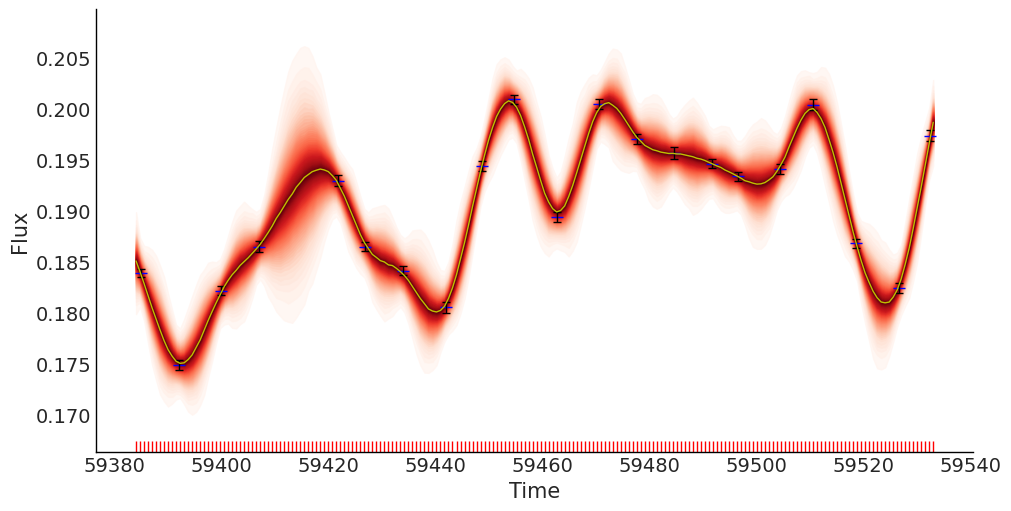

In [25]:
ufn.plot_postpred_samples(se_m32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


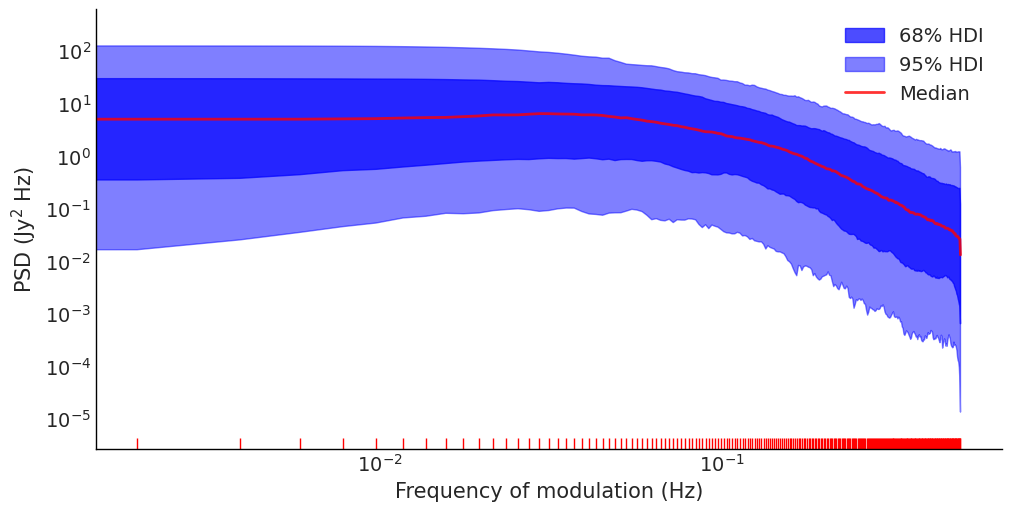

In [26]:
ufn.plot_welch_psd(se_m32_trace, "prior_predictive", "y")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


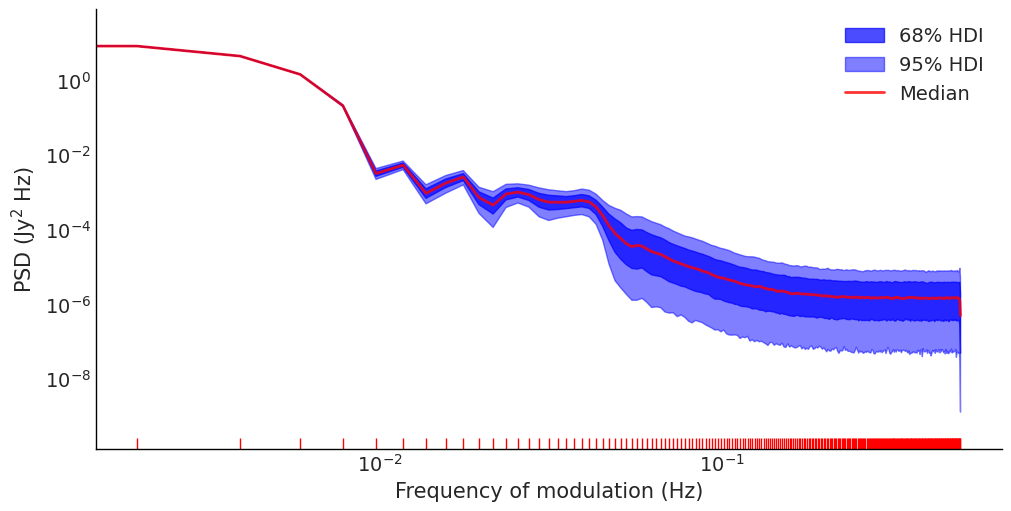

In [27]:
ufn.plot_welch_psd(se_m32_trace);

(0.0014801919594828097, 0.6597539553864471)

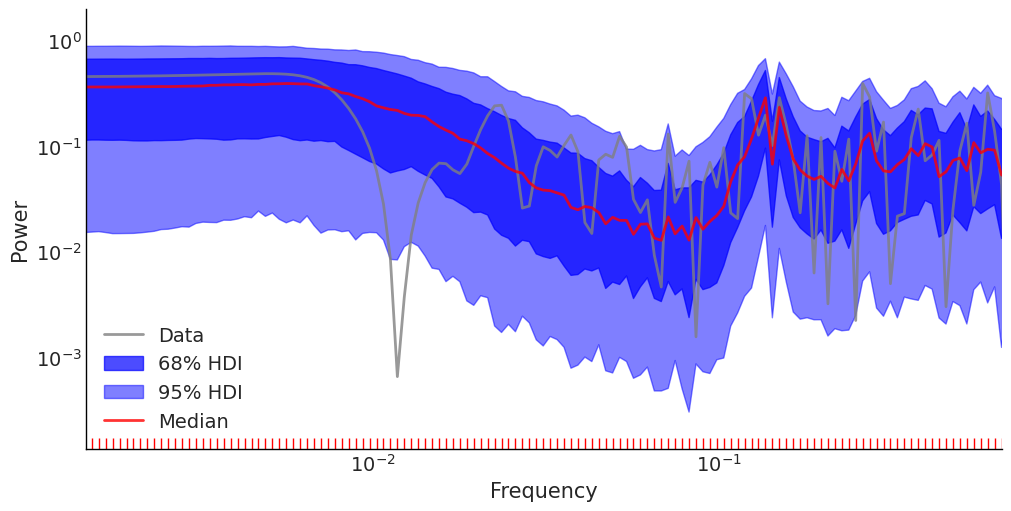

In [28]:
ufn.plot_lsp(se_m32_trace, "prior_predictive", "y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

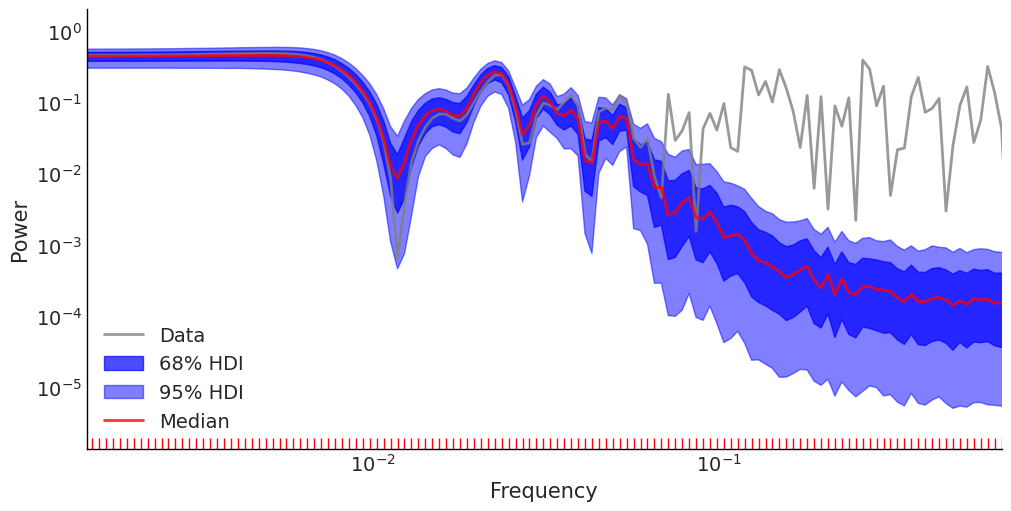

In [29]:
ufn.plot_lsp(se_m32_trace, "posterior_predictive", "f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

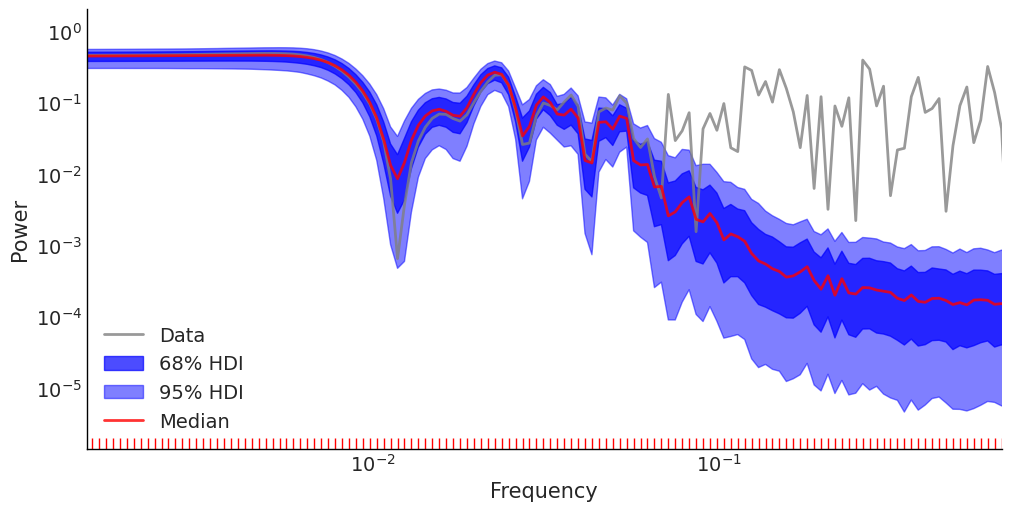

In [30]:
ufn.plot_lsp(se_m32_trace, "posterior_predictive", "y_star")
plt.xlim(this_xlim)

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta \times \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \times \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN}} \sim \mathcal{N}^+(\;\textrm{mean}[\textrm{stderr}(y)]\;, \;\textrm{SD}[\textrm{stderr}(y)]\;)$$

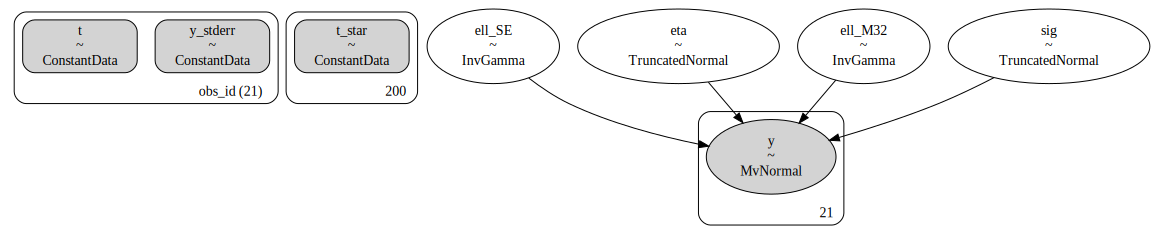

In [31]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_se_m32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [32]:
variable_names = ["ell_SE", "ell_M32", "eta", "sig"]
ufn.print_post_summary(sexm32_trace, variable_names)

median        mad    eti_16%     eti_84%   mcse_median  \
ell_SE   84.731999  28.618600  53.551310  153.393598  1.130584e+00   
ell_M32  94.382932  20.341270  69.832452  134.588237  9.517221e-01   
eta       0.035039   0.017898   0.016631    0.093538  8.845378e-04   
sig       0.000492   0.000027   0.000453    0.000532  9.797387e-07   

          ess_median     ess_tail     r_hat        mean         sd  
ell_SE   2613.488627  2081.797874  1.001430  106.994229  76.354862  
ell_M32  1878.684932  1293.607391  1.003352  103.259046  38.793083  
eta      1704.982251  1456.275149  1.003662    0.064642   0.105188  
sig      2839.002387  2114.788754  1.001374    0.000492   0.000040

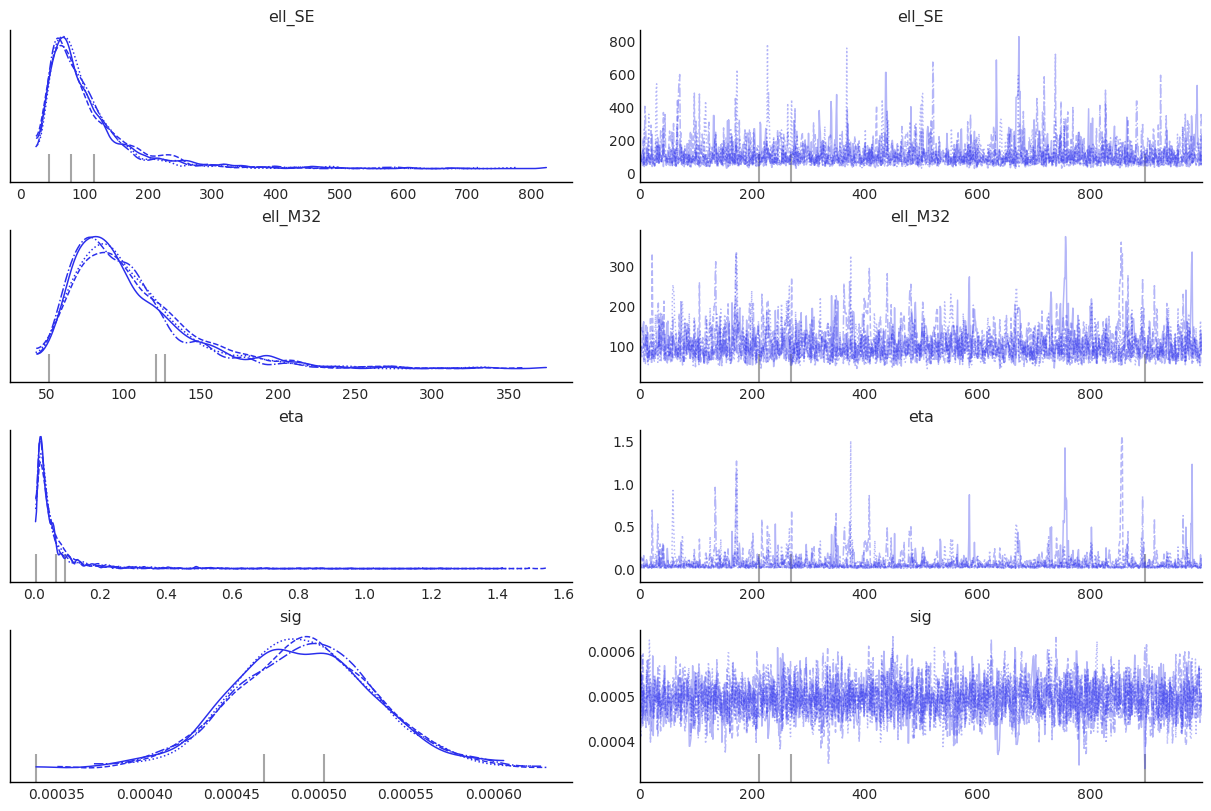

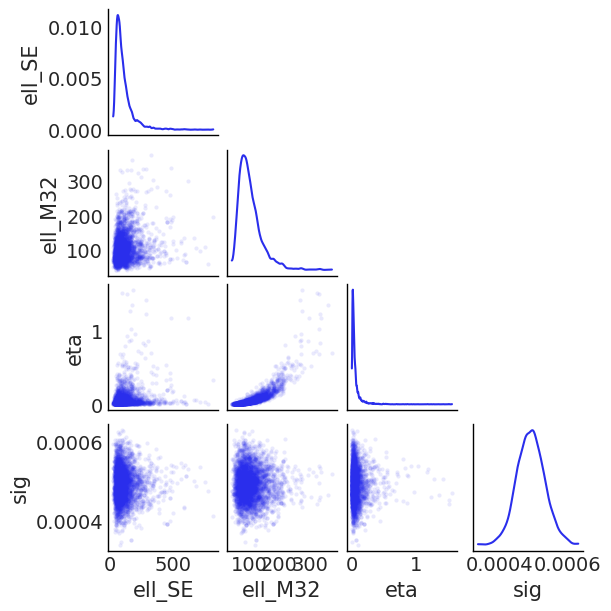

In [33]:
ufn.plot_traces(sexm32_trace, variable_names)
ufn.plot_post_cnr(sexm32_trace, variable_names)

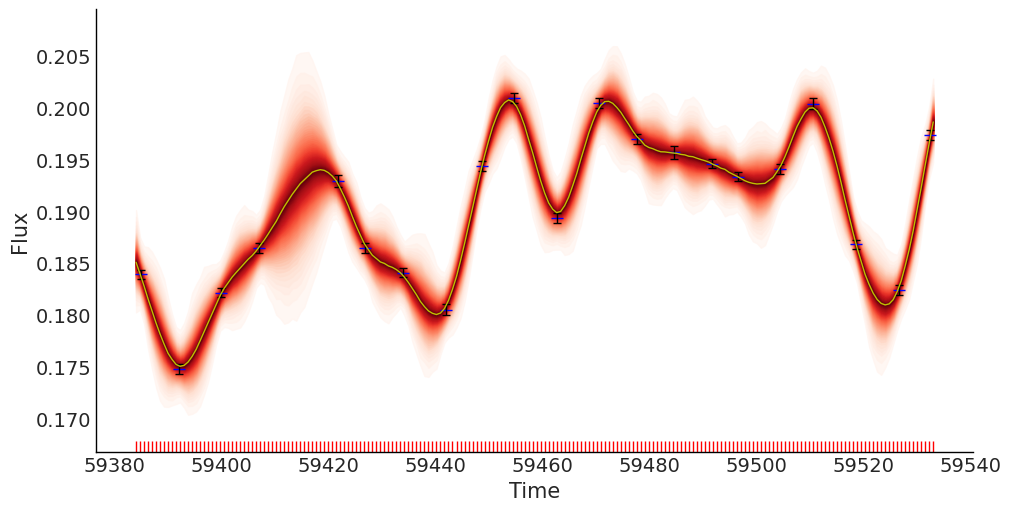

In [34]:
ufn.plot_postpred_samples(sexm32_trace)

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


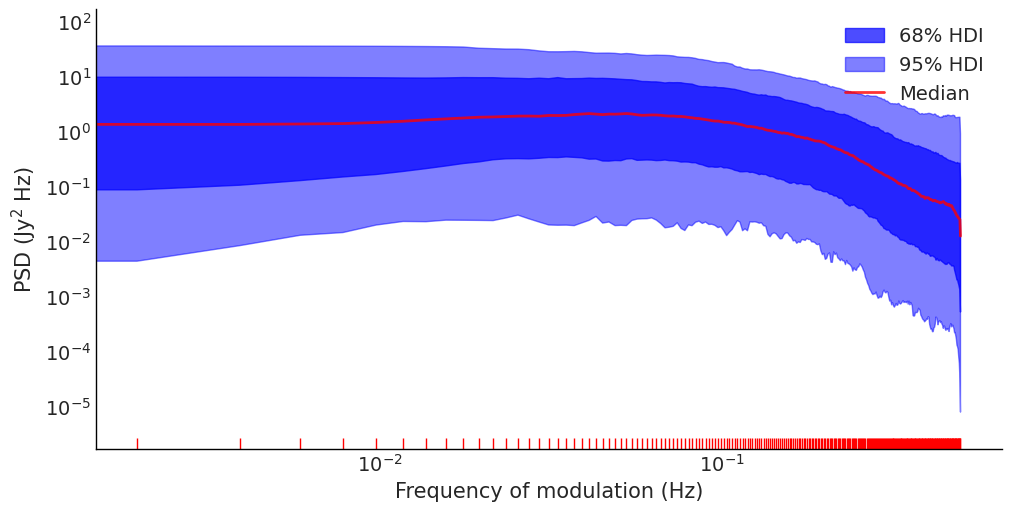

In [35]:
ufn.plot_welch_psd(sexm32_trace, "prior_predictive", "y")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


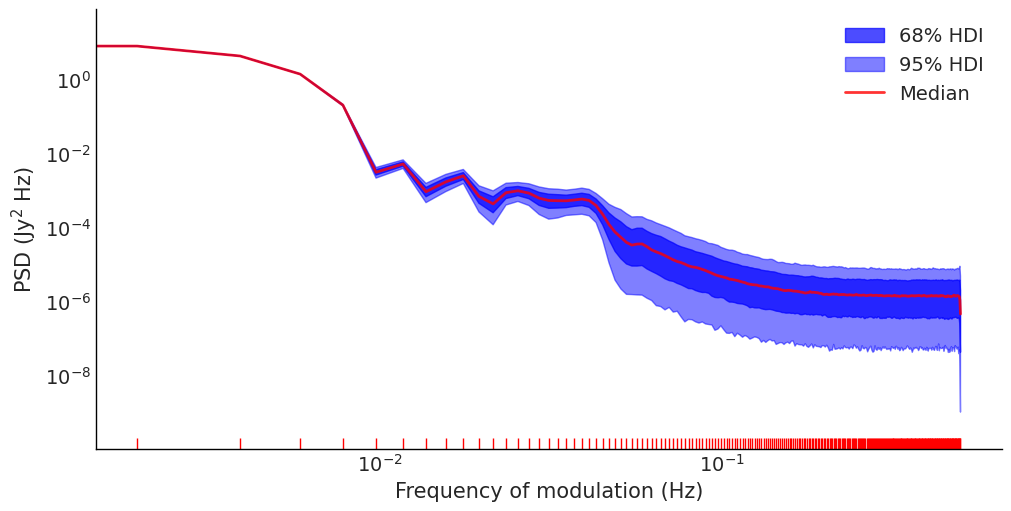

In [36]:
ufn.plot_welch_psd(sexm32_trace)

(0.0014801919594828097, 0.6597539553864471)

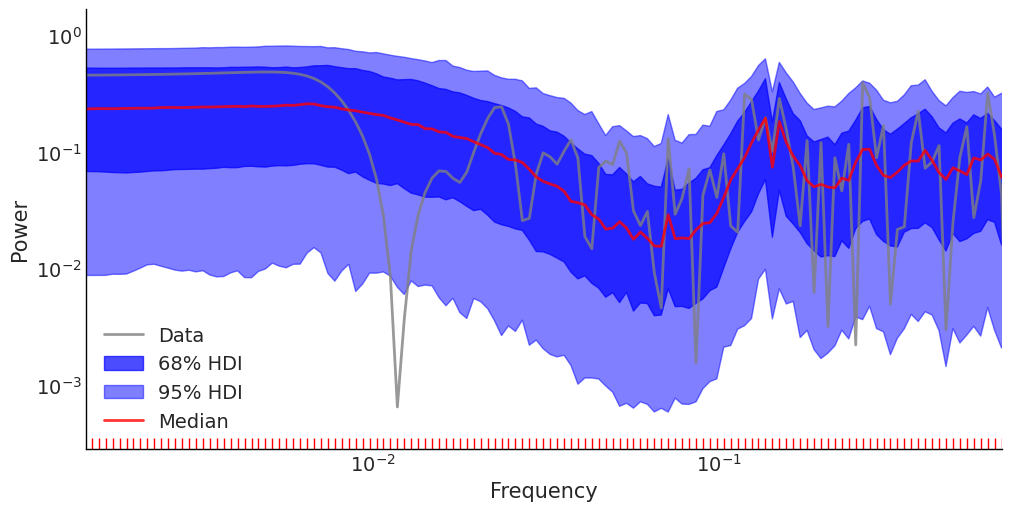

In [37]:
ufn.plot_lsp(sexm32_trace, "prior_predictive", "y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

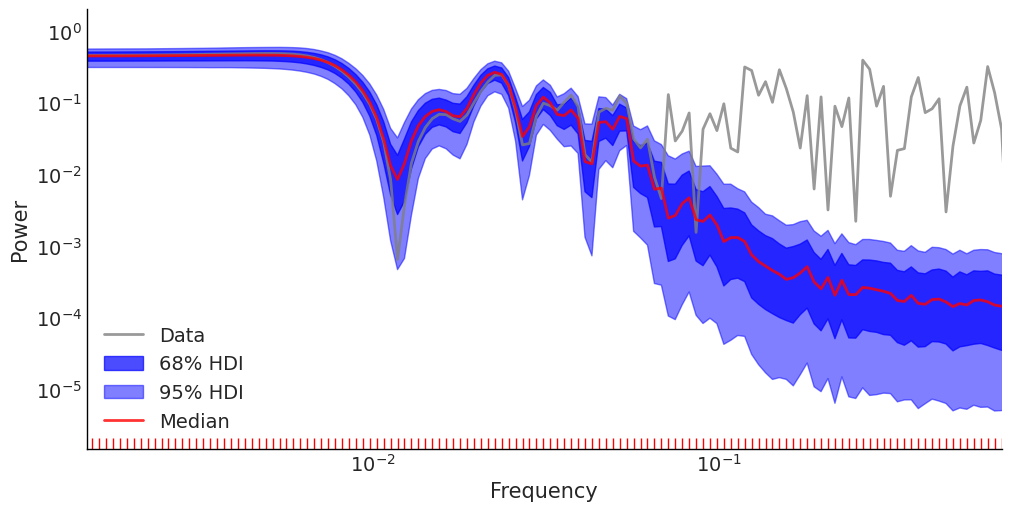

In [38]:
ufn.plot_lsp(sexm32_trace, "posterior_predictive", "f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

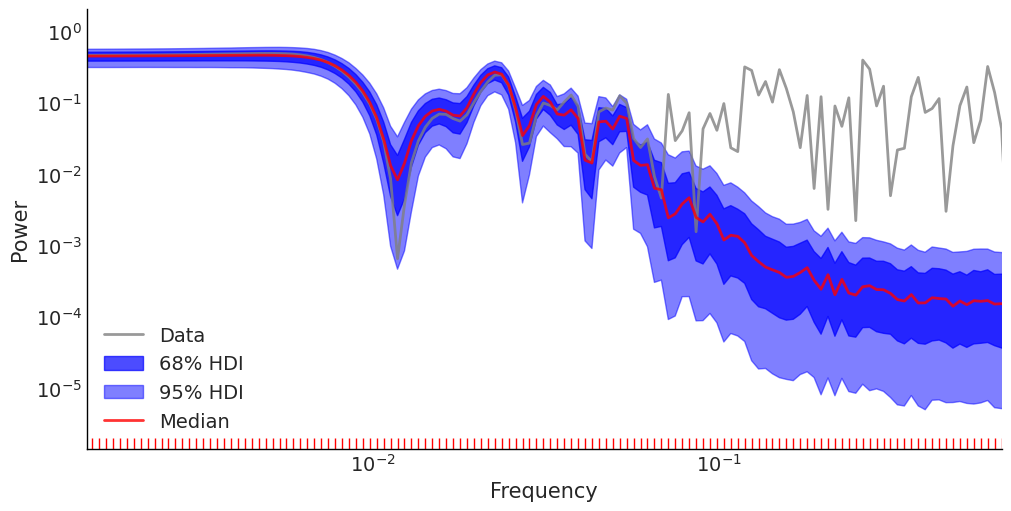

In [39]:
ufn.plot_lsp(sexm32_trace, "posterior_predictive", "y_star")
plt.xlim(this_xlim)

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\ell_\textrm{SE} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\ell_\textrm{M} \sim \textrm{InvGamma}(\alpha = 3, \beta = 8 \times \textrm{min. t gap})$$

$$\eta_\textrm{SE} \sim \mathcal{N}^+(0, 1)$$

$$\eta_\textrm{M} \sim \mathcal{N}^+(0, 1)$$

$$\sigma_{\textrm{WN}} \sim \mathcal{N}^+(\;\textrm{mean}[\textrm{stderr}(y)]\;, \;\textrm{SD}[\textrm{stderr}(y)]\;)$$

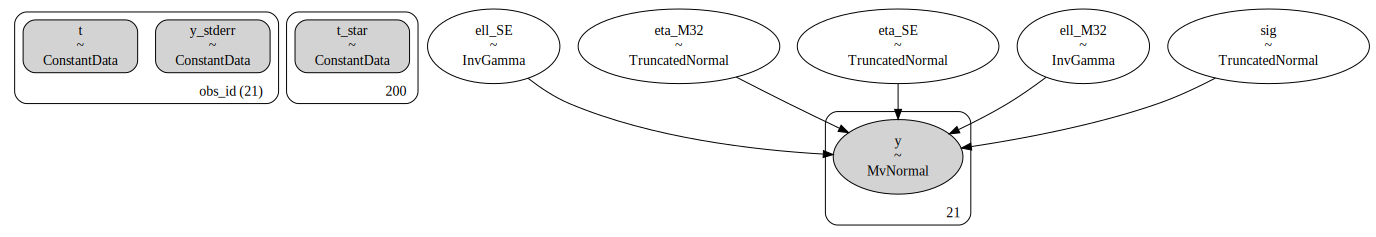

In [40]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_gpSE_gpM32(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [41]:
variable_names = ["ell_SE", "ell_M32", "eta_SE", "eta_M32", "sig"]
ufn.print_post_summary(gpSE_gpM32_trace, variable_names)

median         mad   eti_16%     eti_84%  mcse_median  \
ell_SE   160.202376  138.131826  7.047445  391.067219    61.274591   
ell_M32   13.817580    6.901785  7.515410  377.012199     6.635512   
eta_SE     0.043639    0.043542  0.000110    0.255398     0.031358   
eta_M32    0.000209    0.000158  0.000066    0.034594     0.000325   
sig        0.000490    0.000027  0.000452    0.000530     0.000001   

          ess_median     ess_tail     r_hat        mean          sd  
ell_SE     11.219782    30.338140  1.551772  229.070321  326.687238  
ell_M32    11.397500    29.327893  1.533457  202.215267  550.100273  
eta_SE     11.650769    29.452763  1.531886    0.140616    0.257354  
eta_M32    11.218517    43.425088  1.431246    0.030319    0.110134  
sig      1463.976301  1400.559328  1.003697    0.000491    0.000040

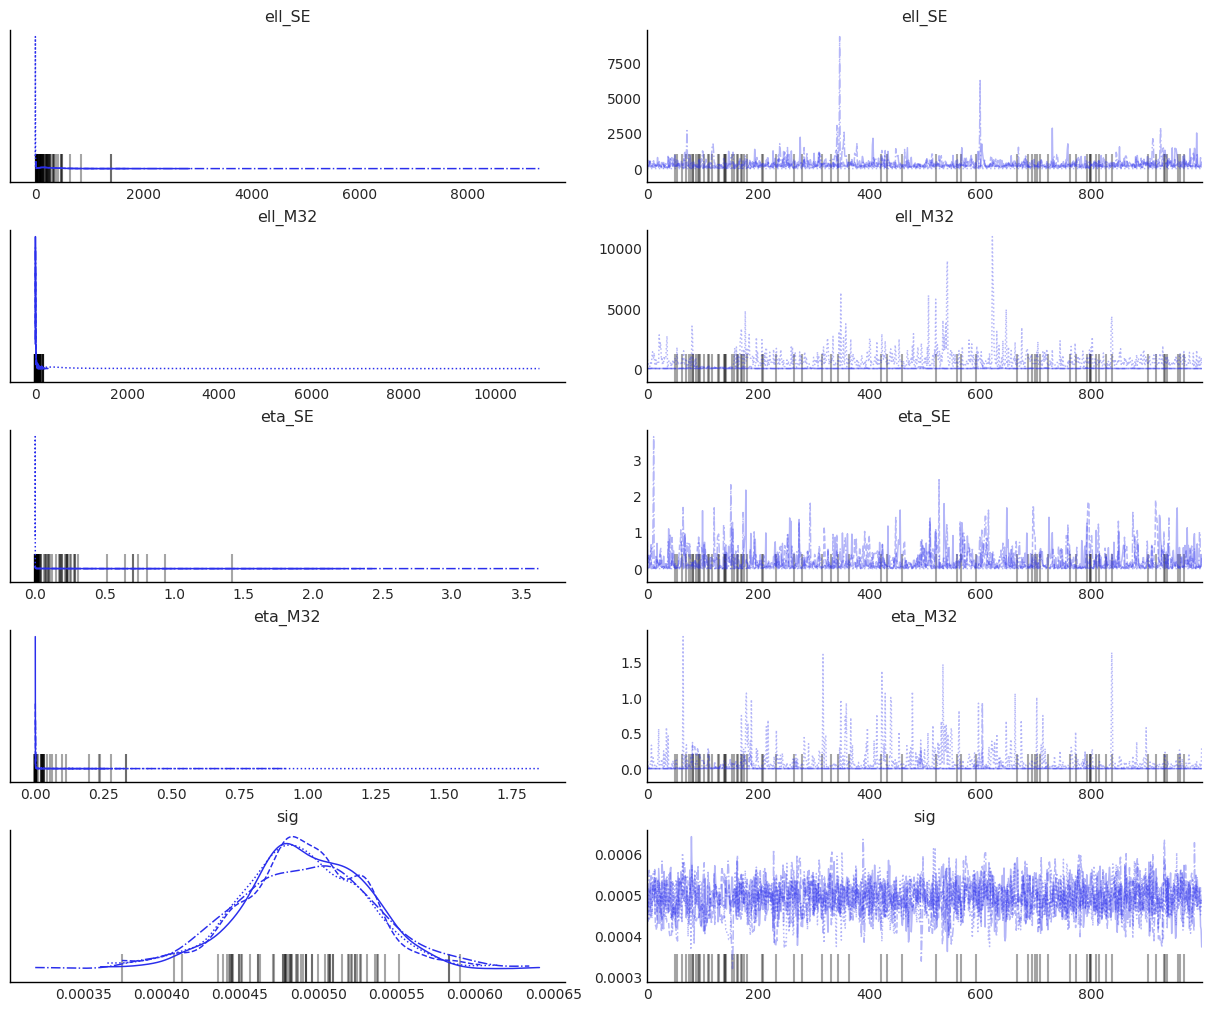

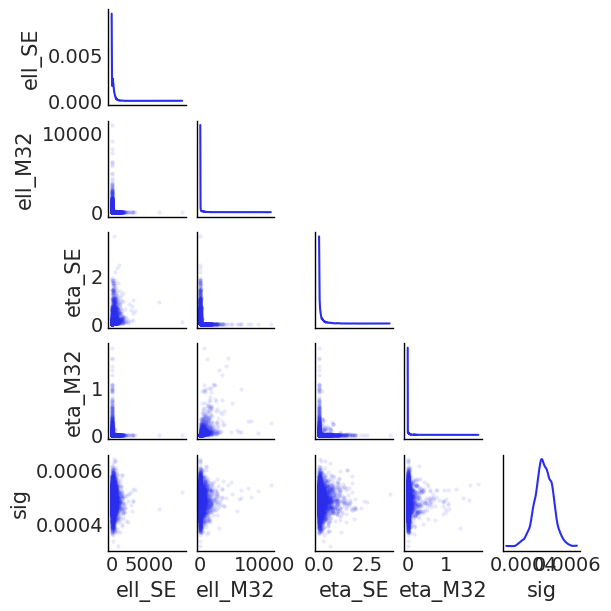

In [42]:
ufn.plot_traces(gpSE_gpM32_trace, variable_names)
ufn.plot_post_cnr(gpSE_gpM32_trace, variable_names)

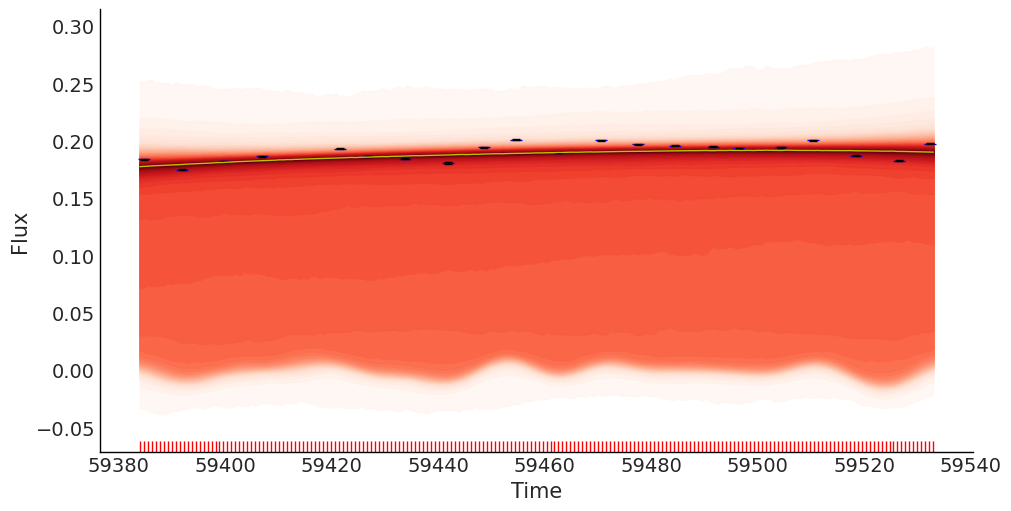

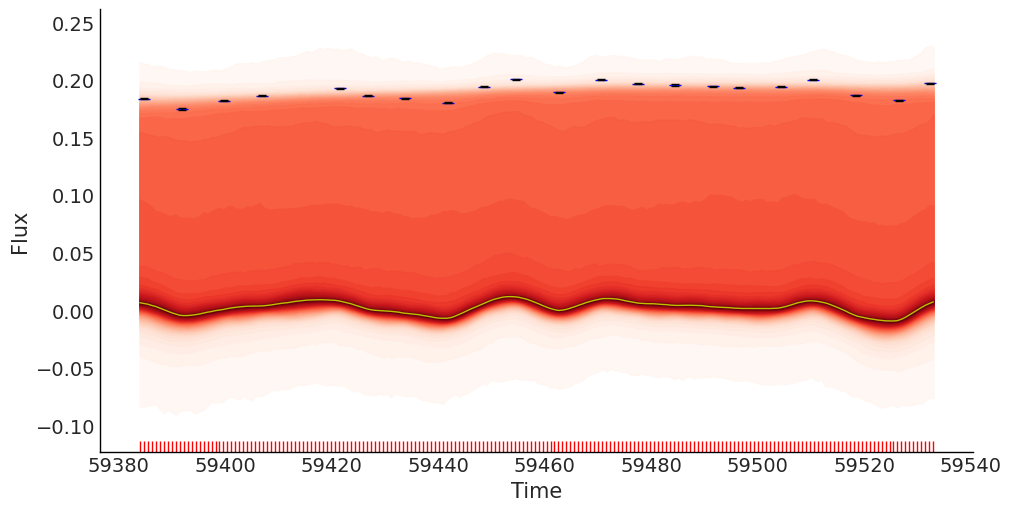

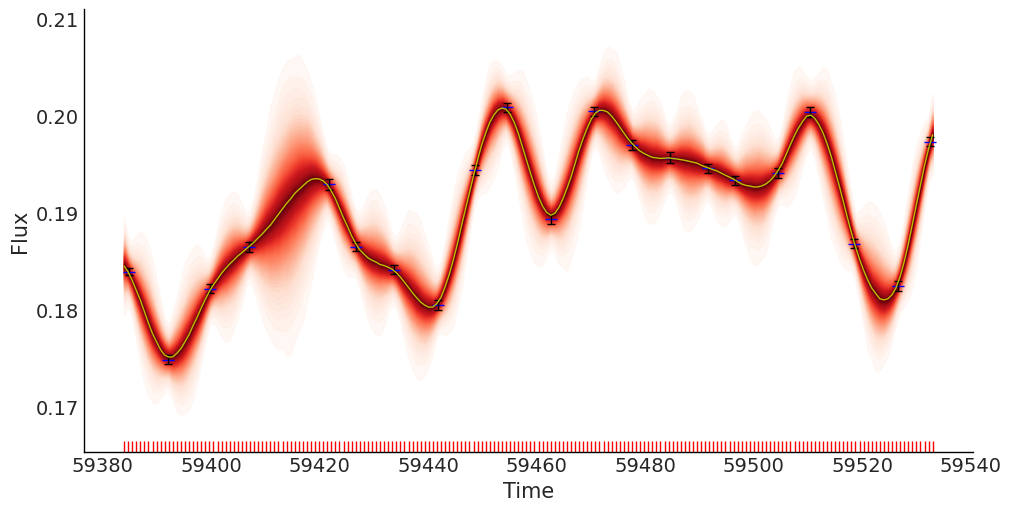

In [43]:
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star_SE")
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star_M32")
ufn.plot_postpred_samples(gpSE_gpM32_trace, "f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


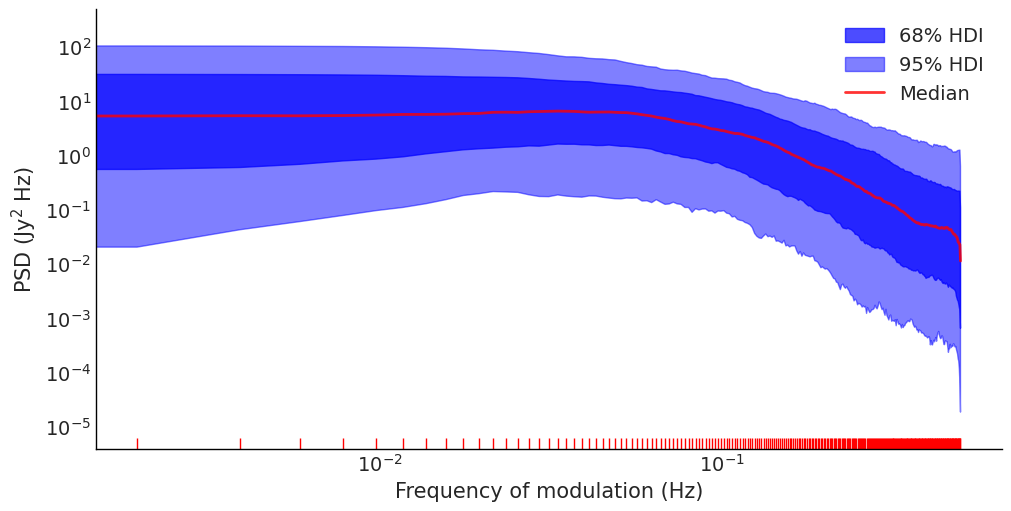

In [44]:
ufn.plot_welch_psd(gpSE_gpM32_trace, group="prior_predictive", variable_name="y")
this_xlim = plt.xlim()

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


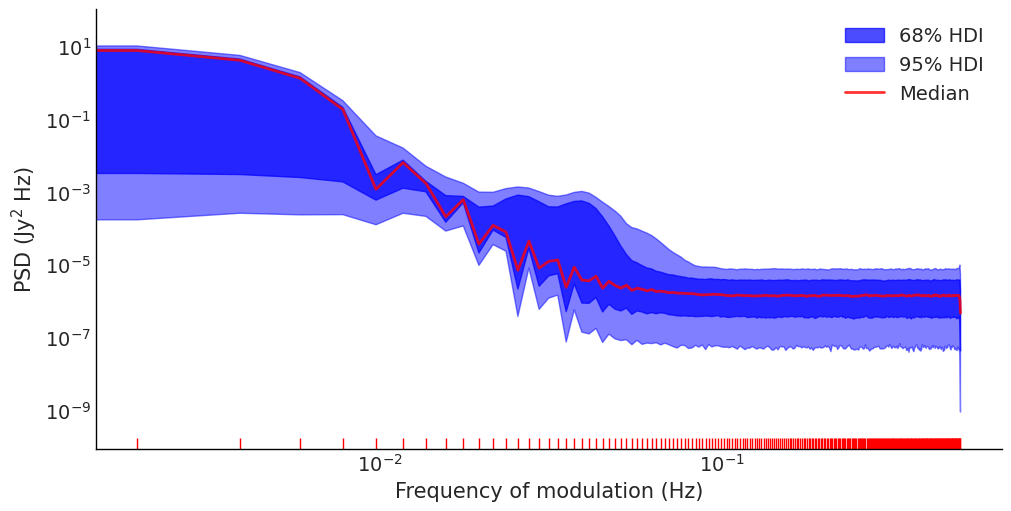

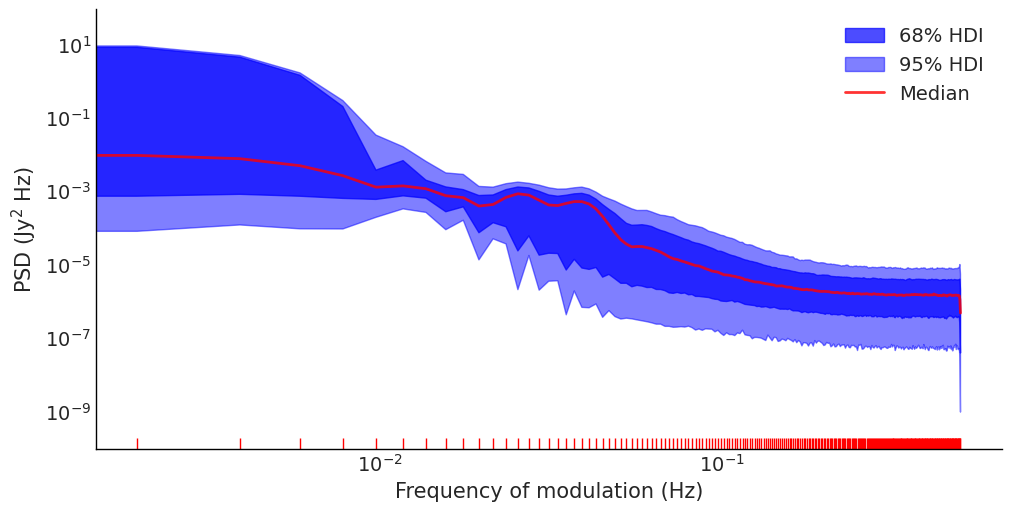

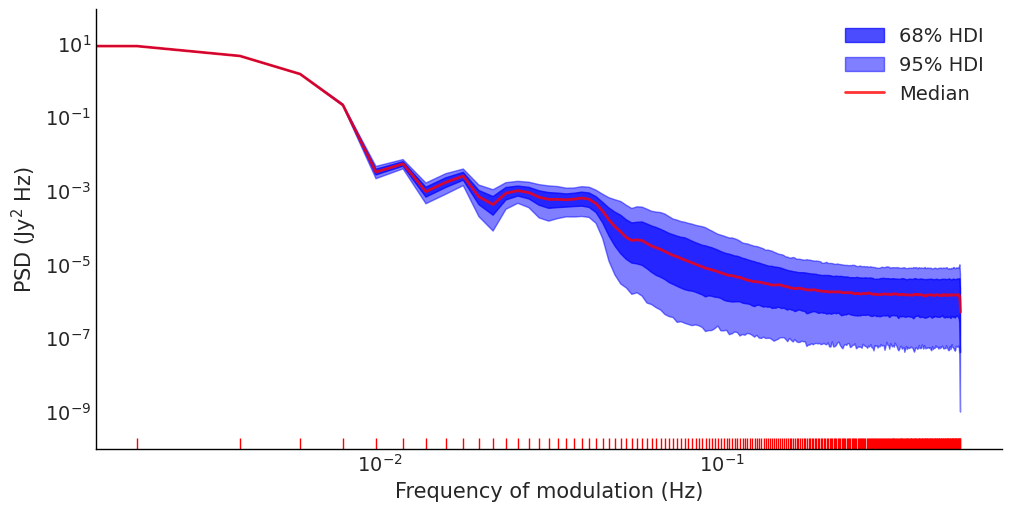

In [45]:
ufn.plot_welch_psd(gpSE_gpM32_trace, group="posterior_predictive", variable_name="f_star_SE")
ufn.plot_welch_psd(gpSE_gpM32_trace, variable_name="f_star_M32")
ufn.plot_welch_psd(gpSE_gpM32_trace, variable_name="f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


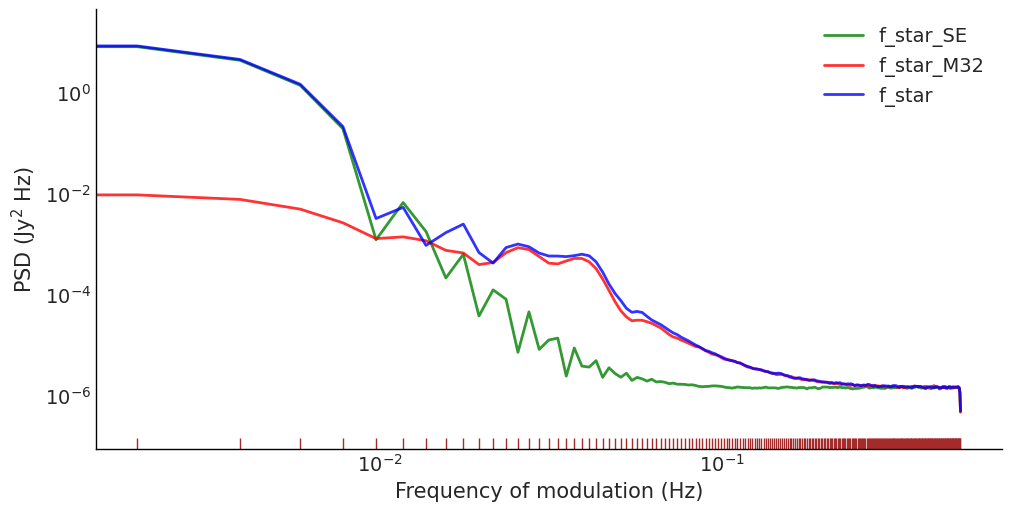

In [47]:
ufn.plot_welch_psds(gpSE_gpM32_trace, variable_names=["f_star_SE", "f_star_M32", "f_star"])

(0.0014801919594828097, 0.6597539553864471)

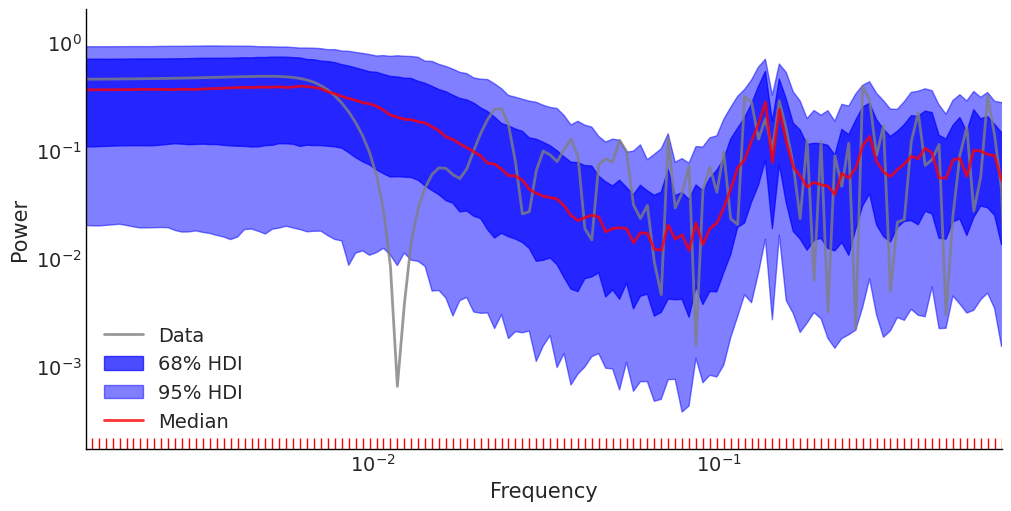

In [48]:
ufn.plot_lsp(gpSE_gpM32_trace, group="prior_predictive", variable_name="y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

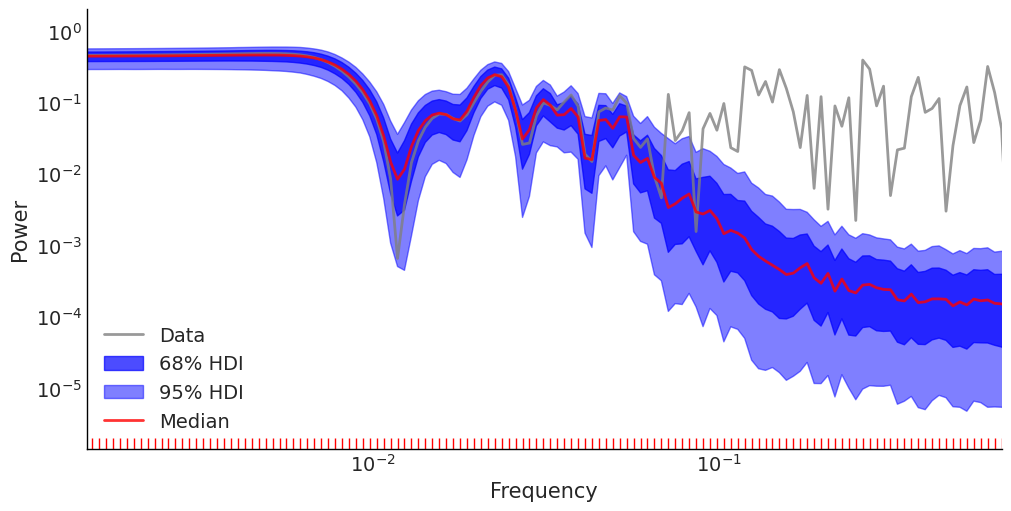

In [49]:
ufn.plot_lsp(gpSE_gpM32_trace, group="posterior_predictive", variable_name="f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

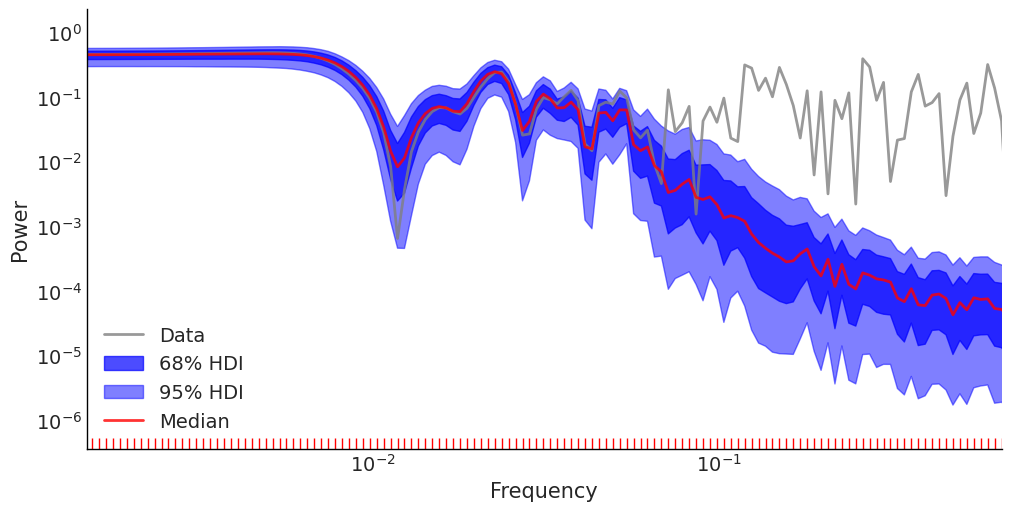

In [50]:
ufn.plot_lsp(gpSE_gpM32_trace, group="posterior_predictive", variable_name="y_star")
plt.xlim(this_xlim)

## SE GP + Periodic GP

$$ Y = f(x) + \varepsilon$$

$$\varepsilon \sim \mathcal{N}(0, \Sigma_\varepsilon)$$

$$\Sigma_\varepsilon = \boldsymbol{e}^2 \boldsymbol{I}$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{P}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}$$

$$\quad k_\textrm{P}(\tau) = \eta_\textrm{P} \exp \left\{ -\frac{1}{2\ell^2_\textrm{P}}\sin^2 \left(\pi\frac{\tau}{T}\right)\right\}$$

$$\ell_\textrm{SE} \sim \textrm{min. gap}(t) + \textrm{InvGamma}\left(\alpha = 3, \beta = \frac{1}{2} \times \textrm{range}(t)\right)$$

$$\ell_\textrm{P} \sim \textrm{min. gap}(t) + \textrm{InvGamma}\left(\alpha = 3, \beta= \frac{1}{2} \times \textrm{range}(t)\right)$$

$$\eta_\textrm{SE} \sim \mathcal{N}^+(0, 1)$$

$$\eta_\textrm{P} \sim \mathcal{N}^+(0, 1)$$

$$T \sim \mathcal{U}\left[4 \times \textrm{min. gap}(t), \frac{1}{4} \times \textrm{range}(t)\right]$$

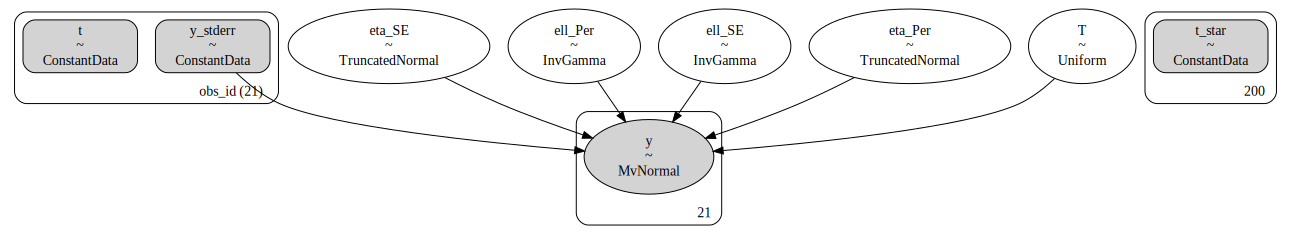

In [51]:
gpSE_gpPer_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpPer_idata.nc")
gpSE_gpPer_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpPer_dag.dot')

if gpSE_gpPer_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpPer_trace = az.from_netcdf(gpSE_gpPer_trace_path)
    gpSE_gpPer_dag = gv.Source.from_file(gpSE_gpPer_dag_path)
else:
    gpSE_gpPer_trace, gpSE_gpPer_dag = ufn.fit_gpSE_gpPer(csv_path, standardise_y=True, rng_seed=rng);
    az.to_netcdf(gpSE_gpPer_trace, gpSE_gpPer_trace_path)
    with open(gpSE_gpPer_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpPer_dag.source)

gv.Source(gpSE_gpPer_dag.source)

In [52]:
variable_names = ["ell_SE", "ell_Per", "eta_SE", "eta_Per", "T"]
ufn.print_post_summary(gpSE_gpPer_trace, variable_names)

median        mad    eti_16%    eti_84%  mcse_median   ess_median  \
ell_SE    3.142907   0.213625   2.827209   3.459956     0.006709  3371.760616   
ell_Per  27.480246  10.191963  16.166527  52.218104     0.392038  2796.889872   
eta_SE    2.171787   0.334734   1.693927   2.712099     0.011597  3376.053517   
eta_Per   0.508205   0.337293   0.127050   1.177213     0.013920  2766.108973   
T        28.431127   4.272171  22.671148  34.106149     0.135888  4274.132350   

            ess_tail     r_hat       mean         sd  
ell_SE   2633.376930  1.002532   3.145092   0.320277  
ell_Per  1614.663520  1.000803  36.362778  33.647608  
eta_SE   3016.450499  1.000392   2.212065   0.517696  
eta_Per  1451.645824  1.000762   0.643525   0.542920  
T        1797.615869  1.001526  28.425454   4.881794

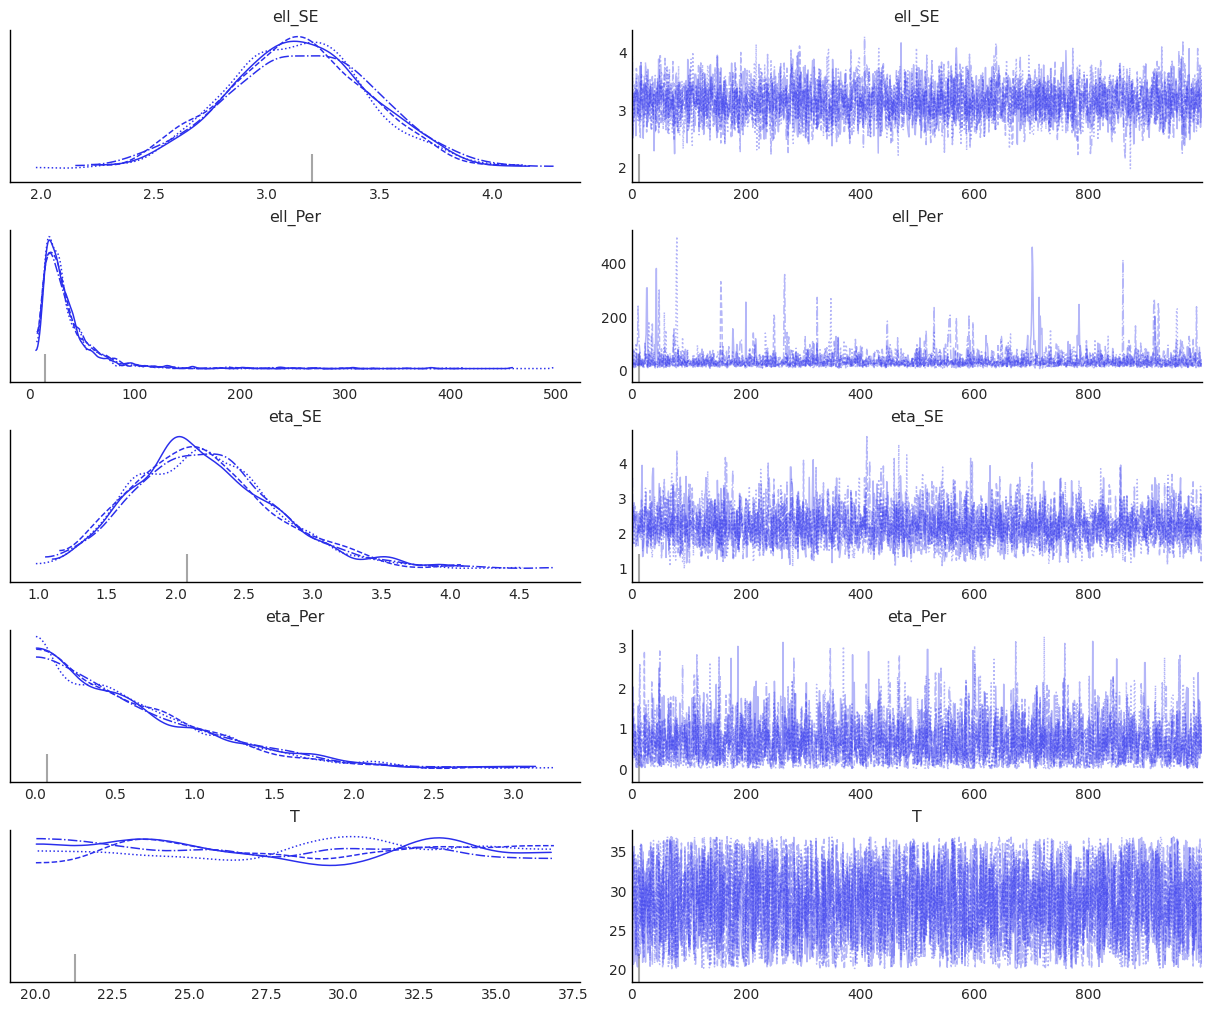

In [53]:
ufn.plot_traces(gpSE_gpPer_trace, variable_names);

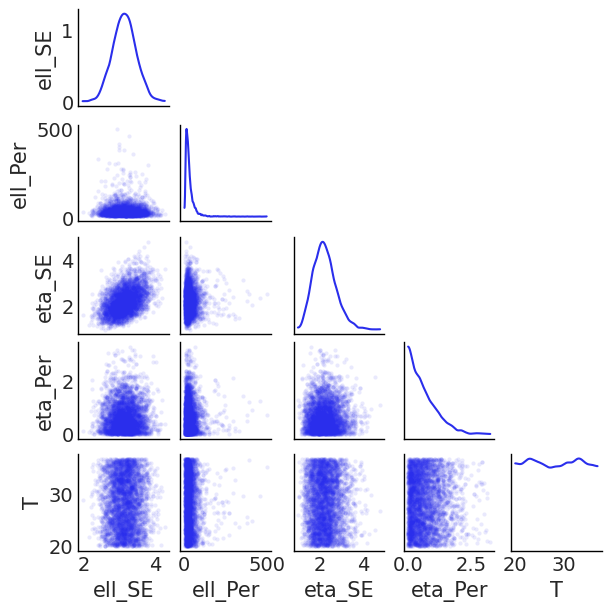

In [54]:
ufn.plot_post_cnr(gpSE_gpPer_trace, variable_names)

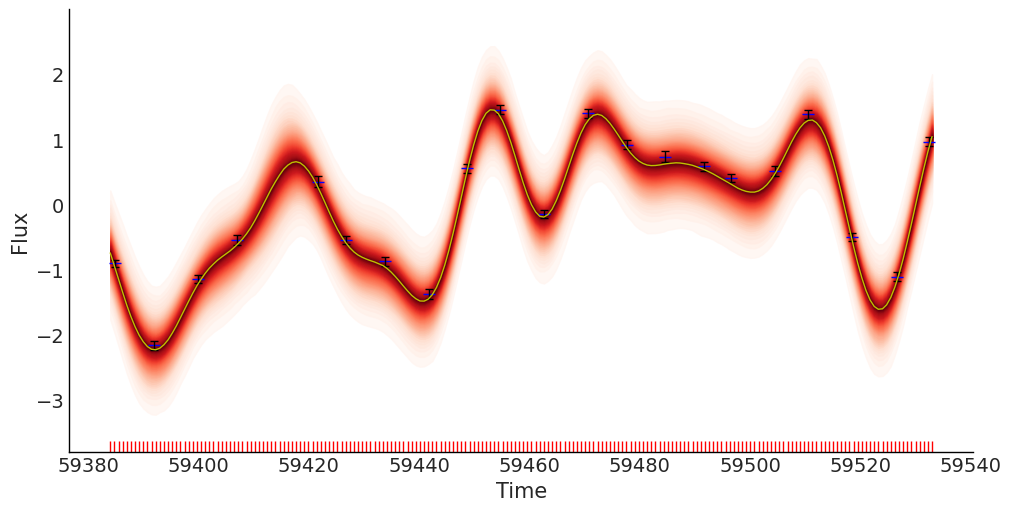

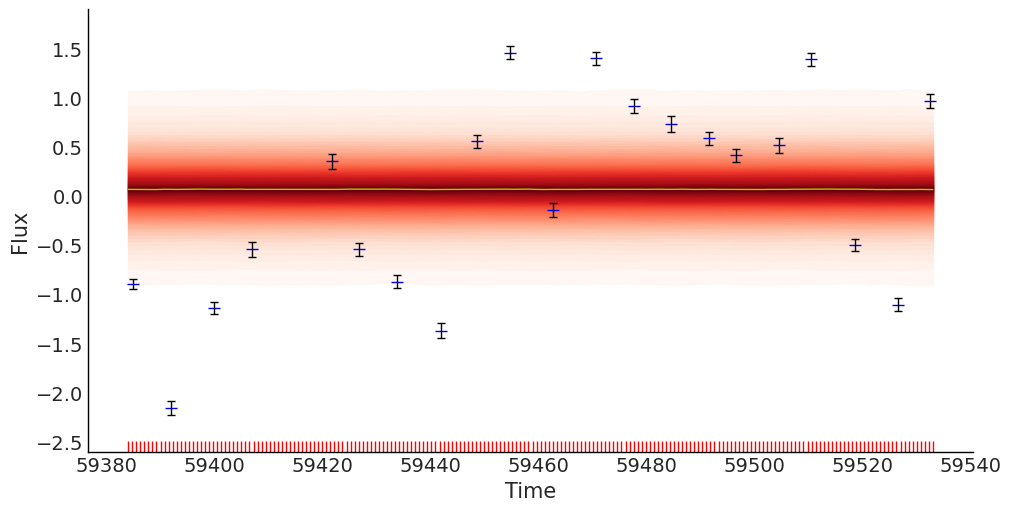

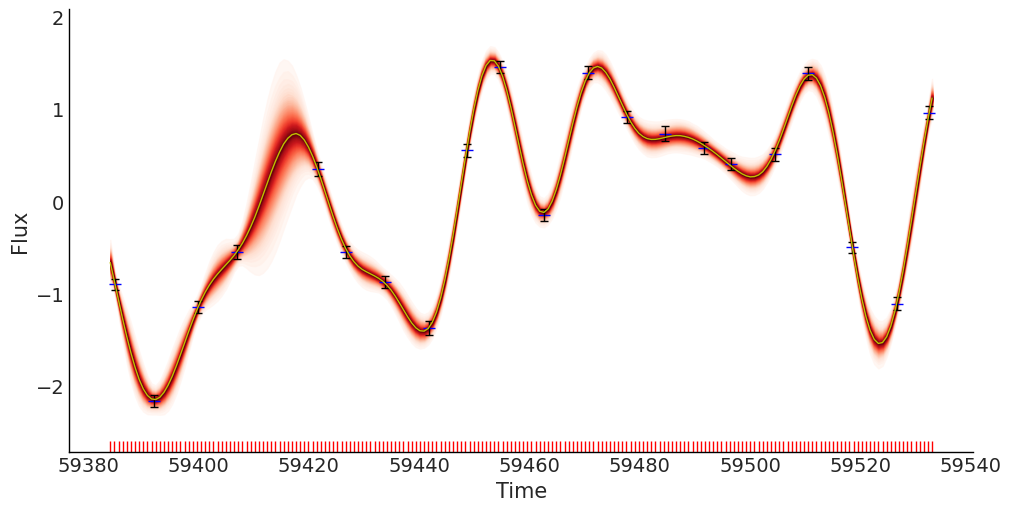

In [55]:
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star_SE")
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star_Per")
ufn.plot_postpred_samples(gpSE_gpPer_trace, "f_star")

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '


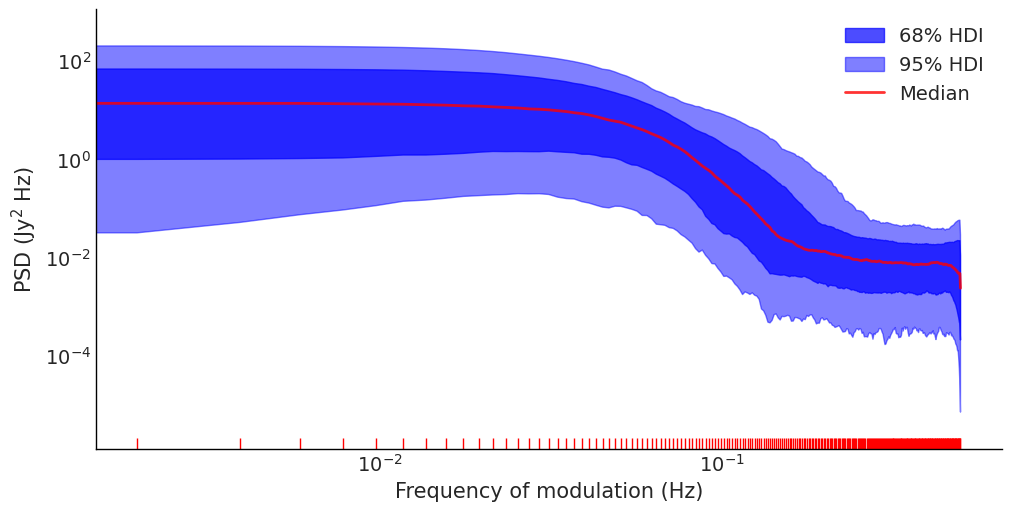

In [56]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="prior_predictive", variable_name="y")
this_xlim = plt.xlim()

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


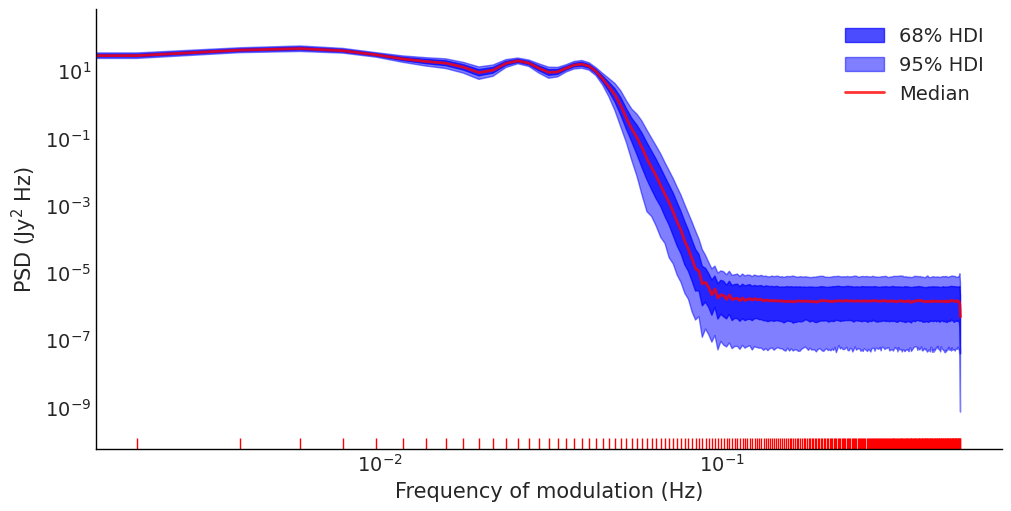

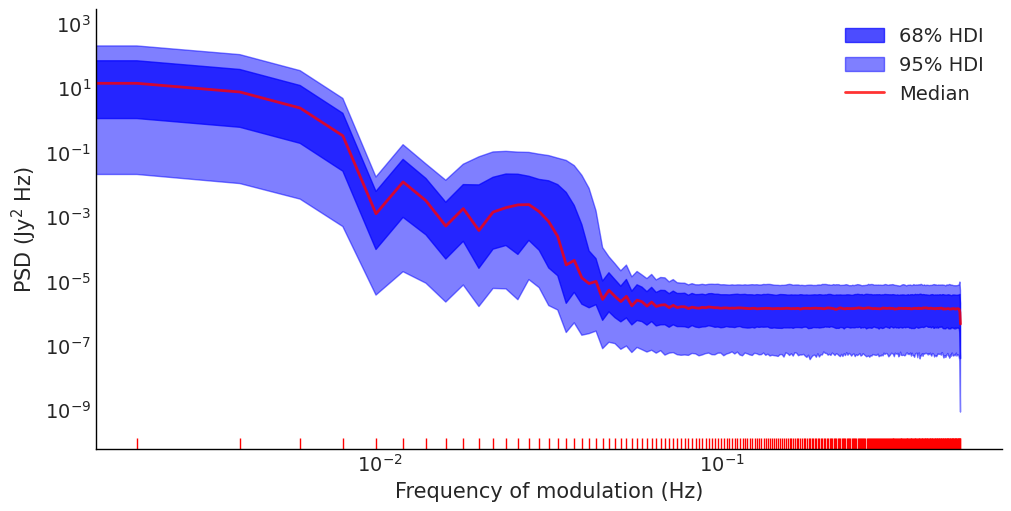

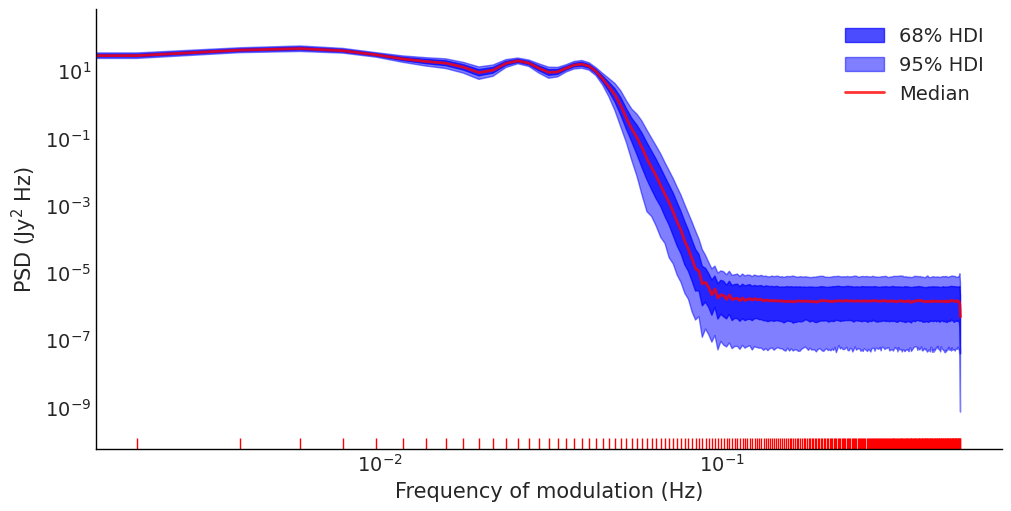

In [57]:
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star");
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star_Per");
ufn.plot_welch_psd(gpSE_gpPer_trace, group="posterior_predictive", variable_name="f_star");

/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/scf/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


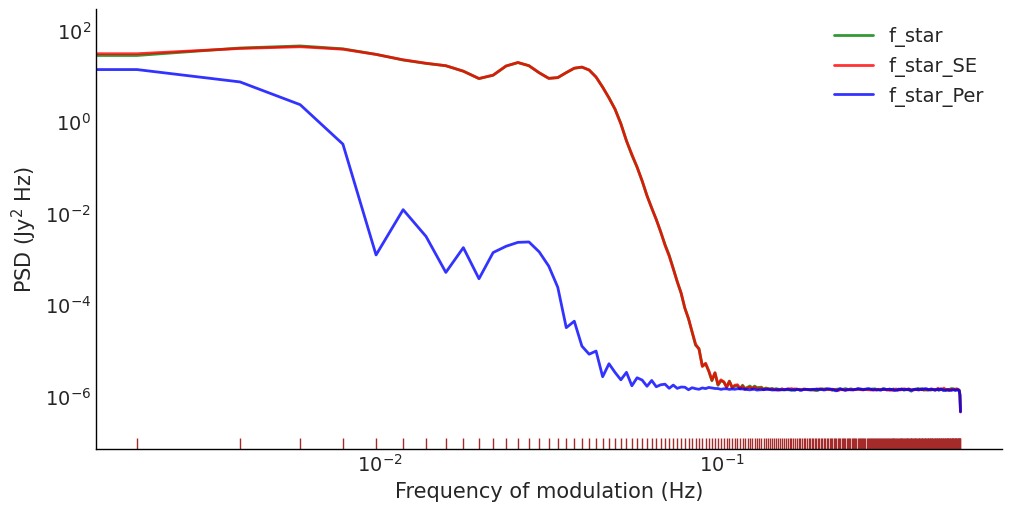

In [58]:
ufn.plot_welch_psds(gpSE_gpPer_trace, variable_names=["f_star", "f_star_SE", "f_star_Per"])

(0.0014801919594828097, 0.6597539553864471)

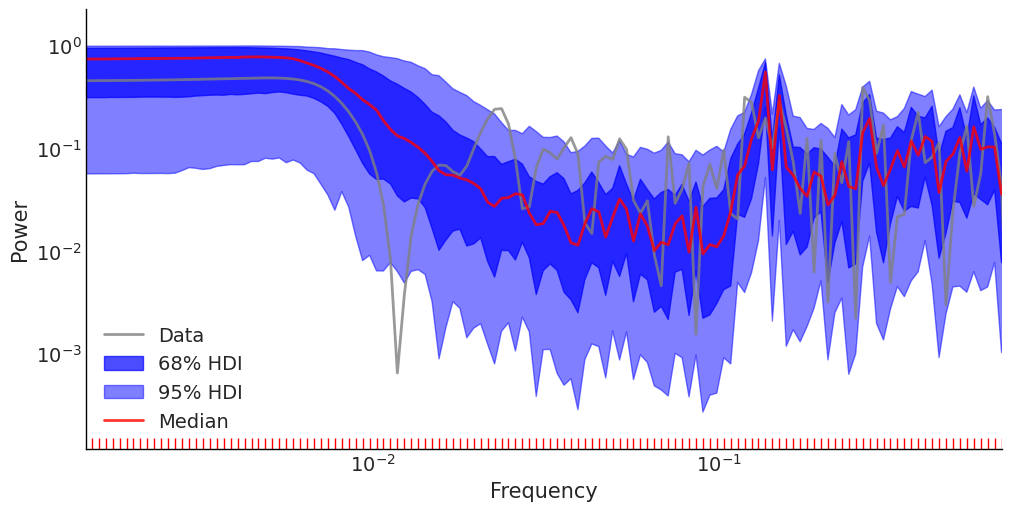

In [59]:
ufn.plot_lsp(gpSE_gpPer_trace, "prior_predictive", "y")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

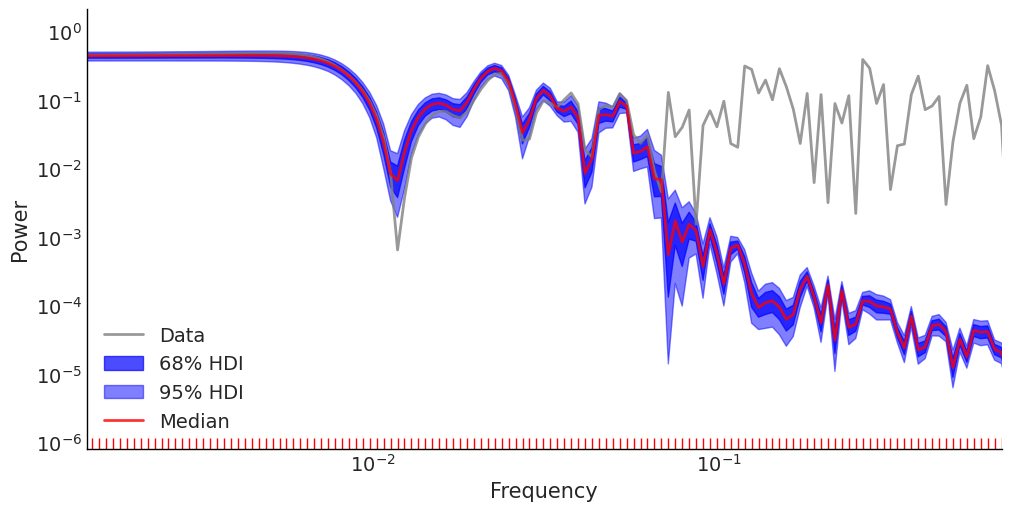

In [60]:
ufn.plot_lsp(gpSE_gpPer_trace, "posterior_predictive", "f_star")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

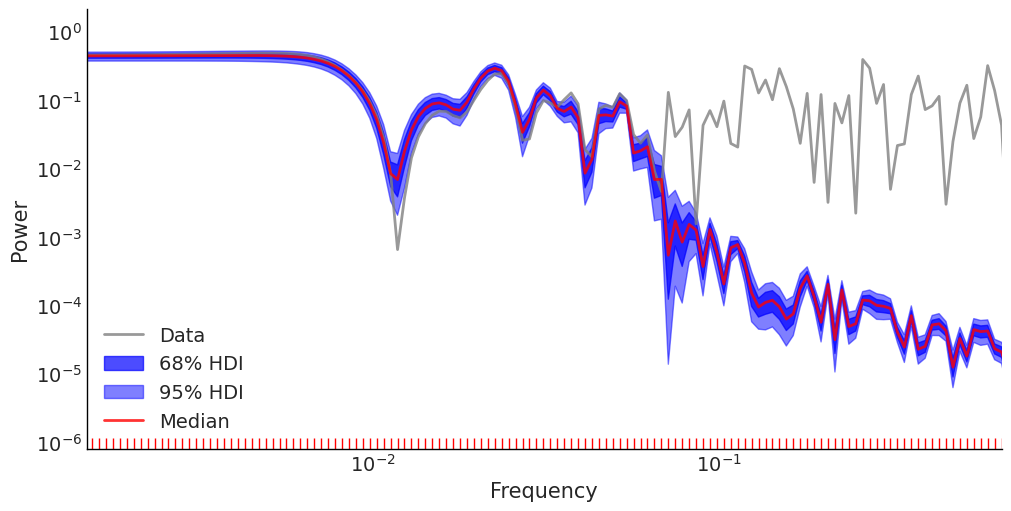

In [61]:
ufn.plot_lsp(gpSE_gpPer_trace, "posterior_predictive", "f_star_SE")
plt.xlim(this_xlim)

(0.0014801919594828097, 0.6597539553864471)

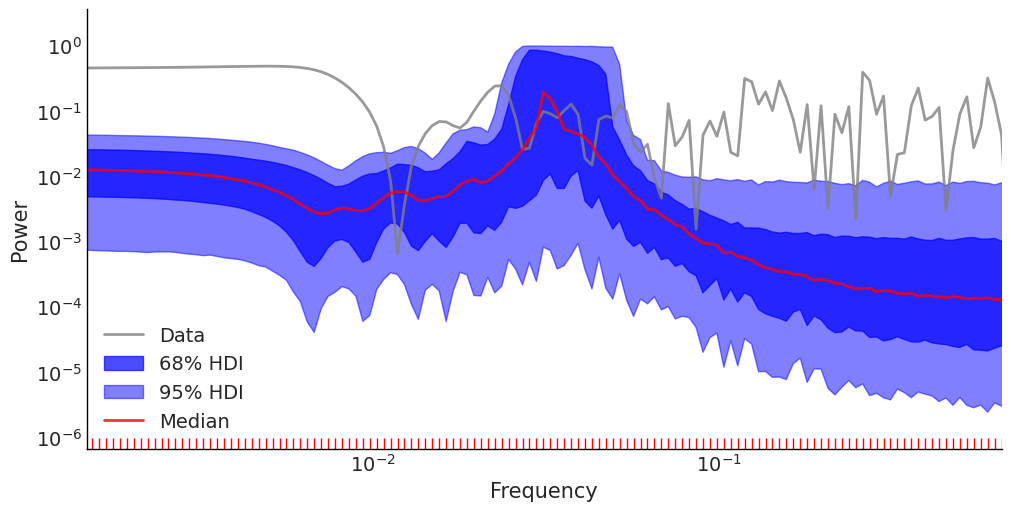

In [62]:
ufn.plot_lsp(gpSE_gpPer_trace, "posterior_predictive", "f_star_Per")
plt.xlim(this_xlim)